In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import datetime
import operator
from sklearn.model_selection import train_test_split


In [1]:
confirmed_cases = pd.read_csv('time_series_covid-19_confirmed.csv')

NameError: name 'pd' is not defined

In [3]:
deaths_reported = pd.read_csv('time_series_covid-19_deaths.csv')

In [4]:
recovered_cases = pd.read_csv('time_series_covid-19_recovered.csv')


In [5]:
confirmed_cases


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,NaN,Central African Republic,6.6111,20.9394,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
446,NaN,Congo (Brazzaville),-4.0383,21.7587,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
447,NaN,Equatorial Guinea,1.5000,10.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
448,Mayotte,France,-12.8275,45.1662,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
deaths_reported.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
recovered_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,33,34,34,35,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,46,76,76,76,101,118,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,96,96,97,105,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,23,24,24,24,26,26,26,35,42


In [8]:
# Extracting all the columns using the .keys() function

cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20'],
      dtype='object')

In [9]:
# Extracting only the dates columns that have information of confirmed, deaths and recovered cases

confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]

In [10]:
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]

In [11]:
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]


In [12]:
# Check the head of the outbreak cases

confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,2,3,5,7,8,8,14,14,14,19,...,48,50,50,50,53,59,70,75,82,114
1,2,1,2,2,4,4,7,7,11,15,...,420,461,502,511,581,639,639,701,773,839
2,0,1,3,3,4,5,7,7,10,13,...,130,138,150,150,160,178,178,200,212,226
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,83,93,99,117,129,149,149,197,238,428


In [13]:
# Finding the total confirmed cases, death cases and the recovered cases and append them to an 4 empty lists
# Also, calculate the total mortality rate which is the death_sum/confirmed cases

dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [14]:
confirmed_sum,death_sum,death_sum,recovered_sum

(167449, 6440, 6440, 76034)

In [15]:
print(world_cases)

[555, 653, 941, 1434, 2118, 2927, 5578, 6166, 8234, 9927, 12038, 16787, 19881, 23892, 27635, 30817, 34391, 37120, 40150, 42762, 44802, 45221, 60368, 66885, 69030, 71224, 73258, 75136, 75639, 76197, 76823, 78579, 78965, 79568, 80413, 81395, 82754, 84120, 86011, 88369, 90306, 92840, 95120, 97882, 101784, 105821, 109795, 113561, 118592, 125865, 128343, 145193, 156097, 167449]


In [16]:
# Convert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [17]:
days_since_1_22,world_cases,total_deaths,total_recovered,

(array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42],
        [43],
        [44],
        [45],
        [46],
        [47],
        [48],
        [49],
        [50],
        [51],
        [52],
        [53]]),
 array([[   555],
        [   653],
        [   941],
        [  1434],
        [  2118],
        [  2927],
        [  5578],
        [  6166],
        [  8234],
        [  9927],
        [ 12038],
        [ 16787],
        [ 19881],
        

In [18]:
# Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

In [19]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63]])

In [20]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    

In [21]:
# For visualization with the latest data of 15th of march

latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [22]:
latest_confirmed,latest_deaths,latest_recoveries

(0      114
 1      839
 2      226
 3        1
 4      428
       ... 
 445      1
 446      1
 447      1
 448      1
 449      1
 Name: 3/15/20, Length: 450, dtype: int64,
 0       1
 1      22
 2       0
 3       0
 4       0
        ..
 445     0
 446     0
 447     0
 448     0
 449     0
 Name: 3/15/20, Length: 450, dtype: int64,
 0       35
 1      118
 2      105
 3        1
 4       42
       ... 
 445      0
 446      0
 447      0
 448      0
 449      0
 Name: 3/15/20, Length: 450, dtype: int64)

In [23]:
# Find the list of unique countries

unique_countries =  list(confirmed_cases['Country/Region'].unique())
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'Netherlands',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',

In [24]:
# The next line of code will basically calculate the total number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [25]:
# number of cases per country/region

print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
China: 81003 cases
Italy: 24747 cases
Iran: 13938 cases
Korea, South: 8162 cases
Spain: 7798 cases
Germany: 5795 cases
France: 4513 cases
US: 3499 cases
Switzerland: 2200 cases
Norway: 1221 cases
United Kingdom: 1144 cases
Netherlands: 1135 cases
Sweden: 1022 cases
Belgium: 886 cases
Denmark: 875 cases
Austria: 860 cases
Japan: 839 cases
Cruise Ship: 696 cases
Malaysia: 428 cases
Qatar: 401 cases
Greece: 331 cases
Australia: 297 cases
Czechia: 253 cases
Canada: 252 cases
Israel: 251 cases
Portugal: 245 cases
Finland: 244 cases
Singapore: 226 cases
Slovenia: 219 cases
Bahrain: 214 cases
Estonia: 171 cases
Iceland: 171 cases
Brazil: 162 cases
Philippines: 140 cases
Romania: 131 cases
Ireland: 129 cases
Poland: 119 cases
Indonesia: 117 cases
Iraq: 116 cases
Thailand: 114 cases
India: 113 cases
Kuwait: 112 cases
Egypt: 110 cases
Lebanon: 110 cases
Saudi Arabia: 103 cases
San Marino: 101 cases
United Arab Emirates: 98 cases
Chile: 74 cases
Russia: 63 ca

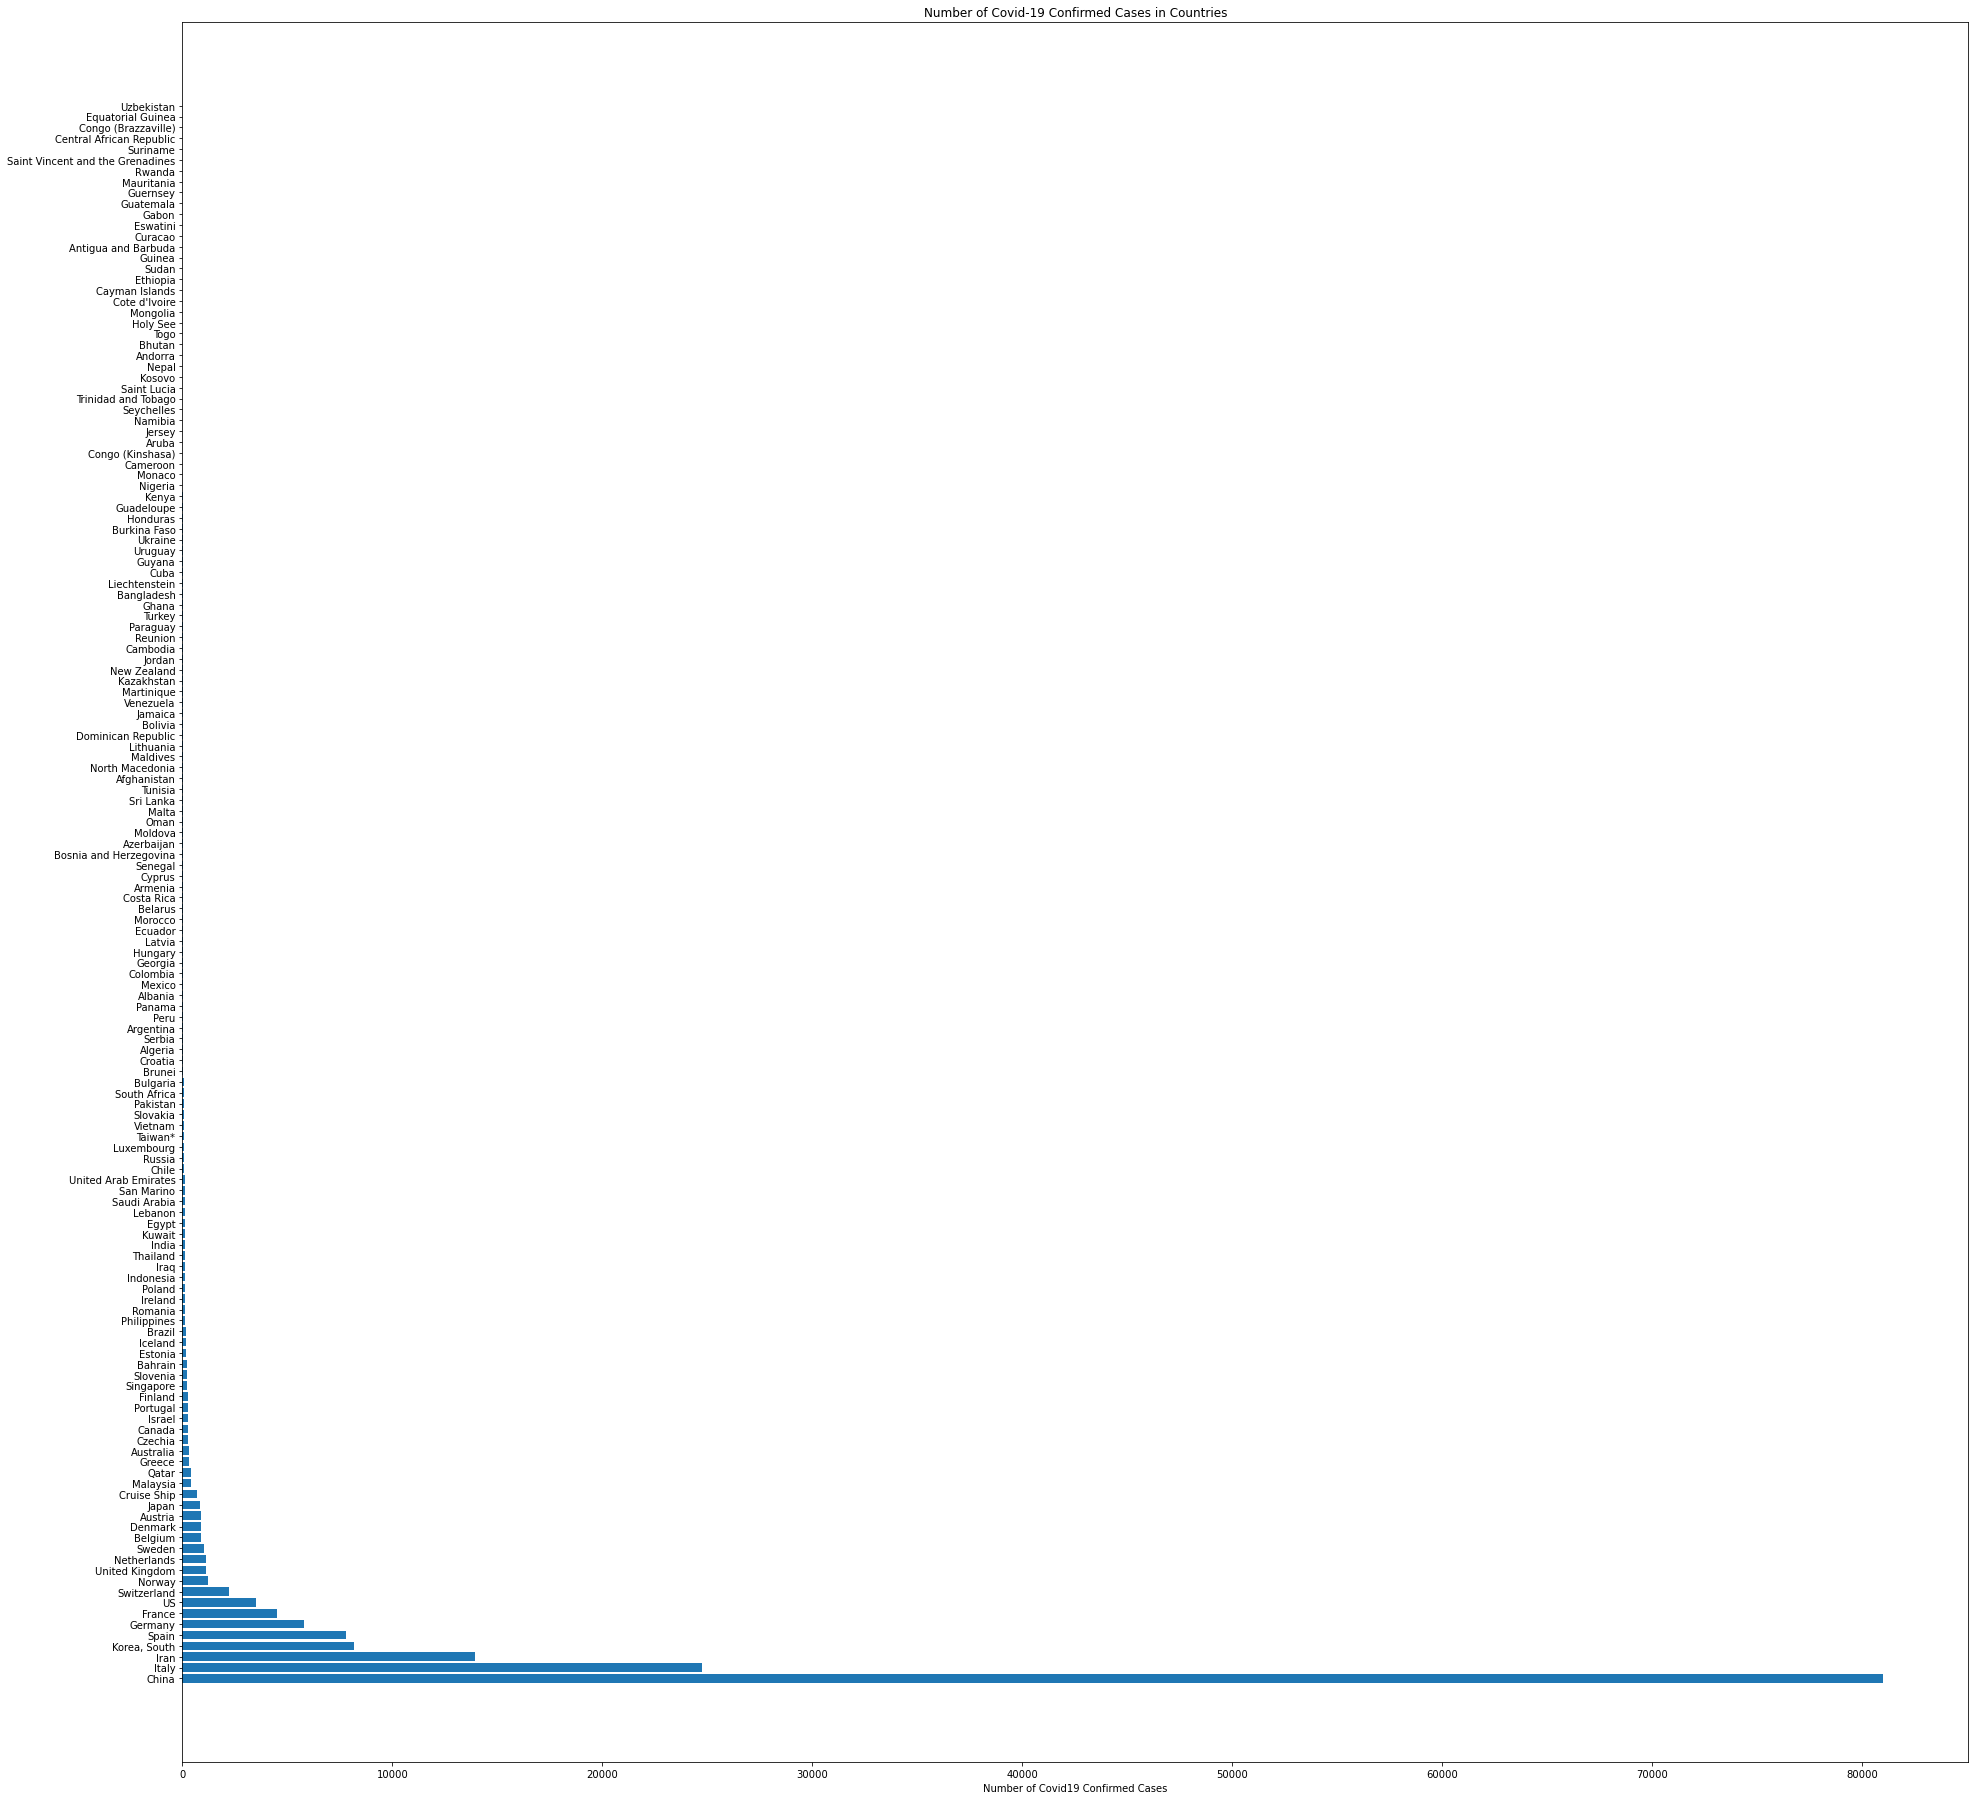

In [26]:
# Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()


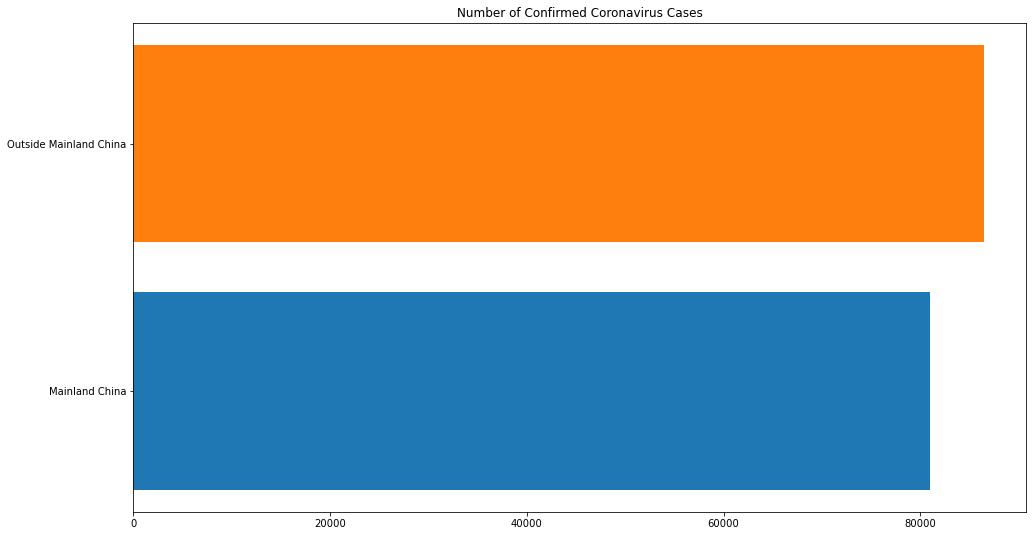

In [27]:
# Plot a bar graph to see the total confirmed cases between mainland china and outside mainland china 

china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 9))
plt.barh('Mainland China', china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.show()

In [28]:
# Print the total cases in mainland china and outside of it

print('Outside Mainland China {} cases:'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland China 86446 cases:
Mainland China: 81003 cases
Total: 167449 cases


In [29]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

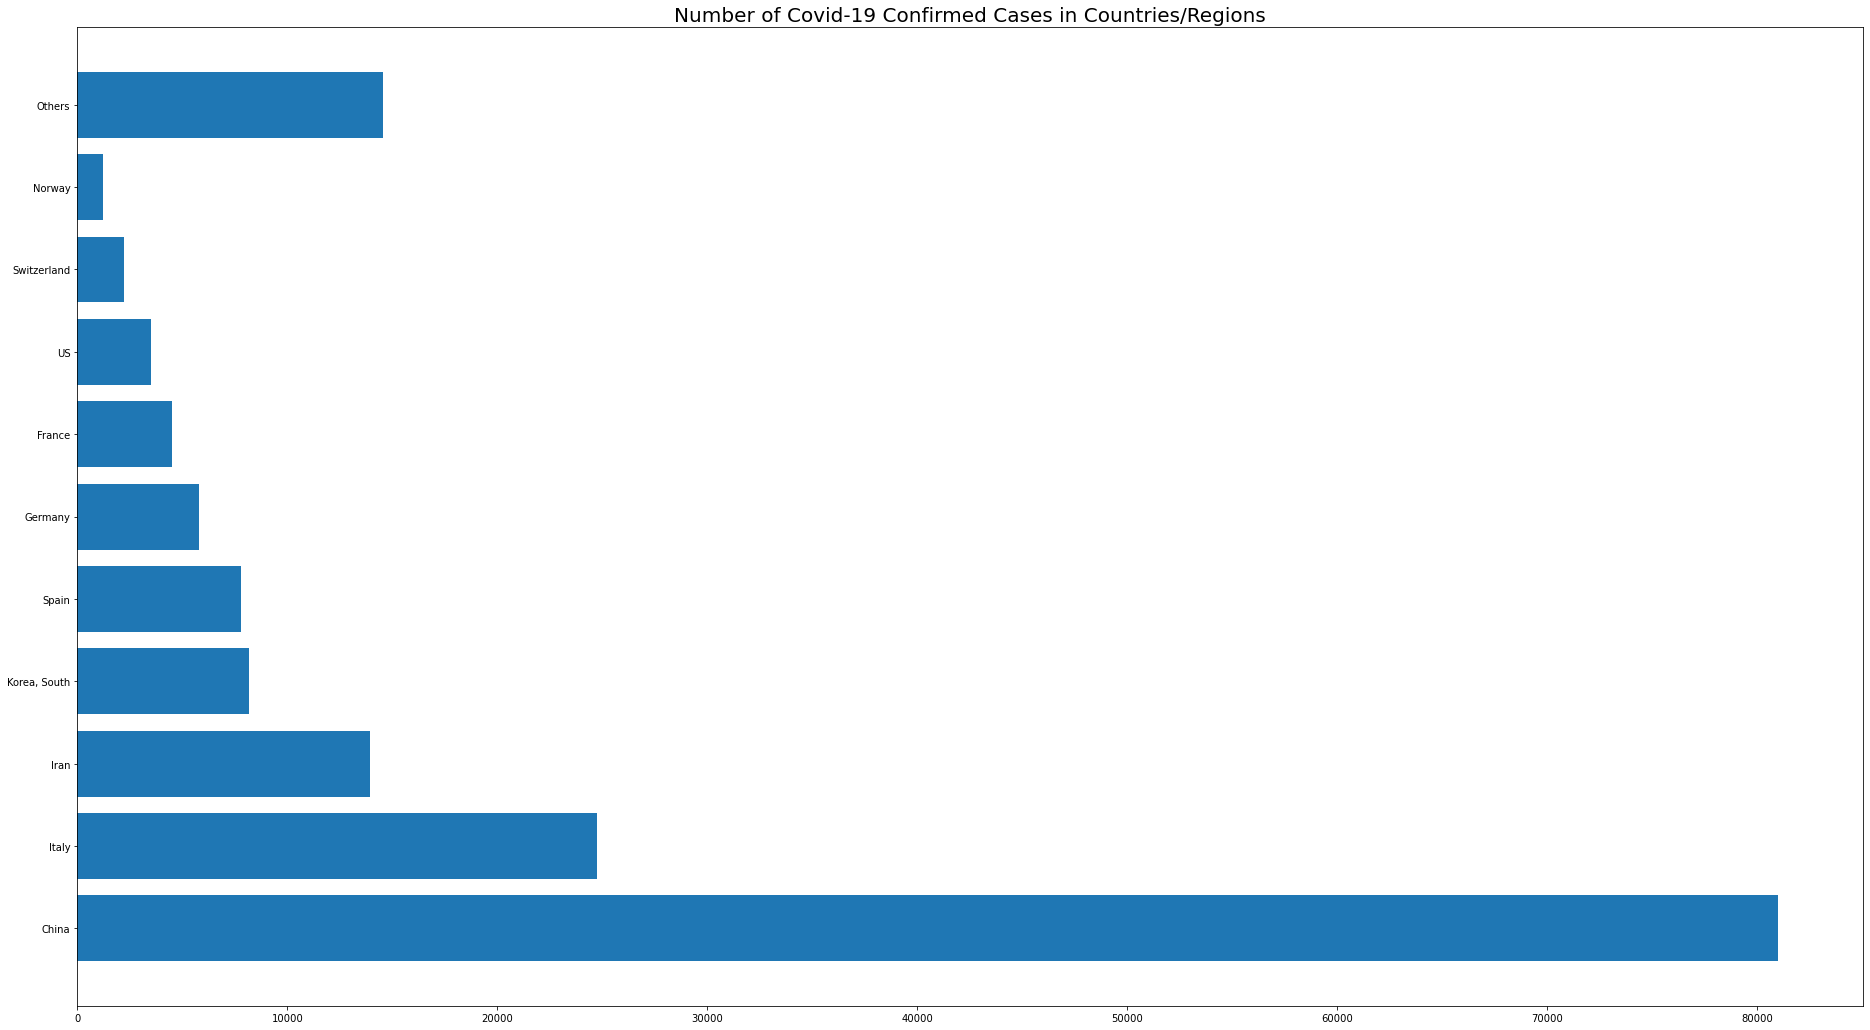

In [30]:
# Visualize the 10 countries

plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

In [31]:
days_since_1_22,world_cases

(array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42],
        [43],
        [44],
        [45],
        [46],
        [47],
        [48],
        [49],
        [50],
        [51],
        [52],
        [53]]),
 array([[   555],
        [   653],
        [   941],
        [  1434],
        [  2118],
        [  2927],
        [  5578],
        [  6166],
        [  8234],
        [  9927],
        [ 12038],
        [ 16787],
        [ 19881],
        

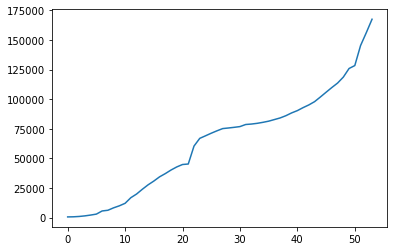

In [32]:
plt.plot(days_since_1_22,world_cases)

In [33]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)
X_train_confirmed.shape, X_test_confirmed.shape, y_train_confirmed.shape, y_test_confirmed.shape


((45, 1), (9, 1), (45, 1), (9, 1))

In [34]:
X_train_confirmed = X_train_confirmed.reshape(45,1,1)
X_test_confirmed = X_test_confirmed.reshape(9,1,1)
X_train_confirmed.shape, X_test_confirmed.shape, y_train_confirmed.shape, y_test_confirmed.shape

((45, 1, 1), (9, 1, 1), (45, 1), (9, 1))

## Model 0

Very basic nural network

Activation Relu
optimizer Adam


In [35]:
model = tf.keras.Sequential()

# hidden layers
model.add(tf.keras.layers.Dense(100, activation='linear', input_dim =1))


# output layer
model.add(tf.keras.layers.Dense(1, activation='relu'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=["accuracy"])
model.fit(X_train_confirmed,y_train_confirmed,epochs=3000)

Epoch 1/3000
2/2 [==============================] - 2s 25ms/step - loss: 3700227328.0000 - accuracy: 0.0000e+00
Epoch 2/3000
2/2 [==============================] - 0s 5ms/step - loss: 3700089088.0000 - accuracy: 0.0000e+00
Epoch 3/3000
2/2 [==============================] - 0s 3ms/step - loss: 3699936000.0000 - accuracy: 0.0000e+00
Epoch 4/3000
2/2 [==============================] - 0s 3ms/step - loss: 3699796224.0000 - accuracy: 0.0000e+00
Epoch 5/3000
2/2 [==============================] - 0s 4ms/step - loss: 3699657472.0000 - accuracy: 0.0000e+00
Epoch 6/3000
2/2 [==============================] - 0s 2ms/step - loss: 3699503872.0000 - accuracy: 0.0000e+00
Epoch 7/3000
2/2 [==============================] - 0s 5ms/step - loss: 3699363840.0000 - accuracy: 0.0000e+00
Epoch 8/3000
2/2 [==============================] - 0s 3ms/step - loss: 3699215616.0000 - accuracy: 0.0000e+00
Epoch 9/3000
2/2 [==============================] - 0s 3ms/step - loss: 3699075328.0000 - accuracy: 0.0000e+00


2/2 [==============================] - 0s 4ms/step - loss: 3642629120.0000 - accuracy: 0.0000e+00
Epoch 147/3000
2/2 [==============================] - 0s 3ms/step - loss: 3641861120.0000 - accuracy: 0.0000e+00
Epoch 148/3000
2/2 [==============================] - 0s 2ms/step - loss: 3641041408.0000 - accuracy: 0.0000e+00
Epoch 149/3000
2/2 [==============================] - 0s 2ms/step - loss: 3640217856.0000 - accuracy: 0.0000e+00
Epoch 150/3000
2/2 [==============================] - 0s 2ms/step - loss: 3639382272.0000 - accuracy: 0.0000e+00
Epoch 151/3000
2/2 [==============================] - 0s 3ms/step - loss: 3638570752.0000 - accuracy: 0.0000e+00
Epoch 152/3000
2/2 [==============================] - 0s 3ms/step - loss: 3637662208.0000 - accuracy: 0.0000e+00
Epoch 153/3000
2/2 [==============================] - 0s 3ms/step - loss: 3636817664.0000 - accuracy: 0.0000e+00
Epoch 154/3000
2/2 [==============================] - 0s 4ms/step - loss: 3636012544.0000 - accuracy: 0.0000e+0

2/2 [==============================] - 0s 2ms/step - loss: 3459327488.0000 - accuracy: 0.0000e+00
Epoch 291/3000
2/2 [==============================] - 0s 2ms/step - loss: 3457717248.0000 - accuracy: 0.0000e+00
Epoch 292/3000
2/2 [==============================] - 0s 5ms/step - loss: 3455970048.0000 - accuracy: 0.0000e+00
Epoch 293/3000
2/2 [==============================] - 0s 5ms/step - loss: 3454228480.0000 - accuracy: 0.0000e+00
Epoch 294/3000
2/2 [==============================] - 0s 6ms/step - loss: 3452577792.0000 - accuracy: 0.0000e+00
Epoch 295/3000
2/2 [==============================] - 0s 4ms/step - loss: 3450867200.0000 - accuracy: 0.0000e+00
Epoch 296/3000
2/2 [==============================] - 0s 2ms/step - loss: 3449075200.0000 - accuracy: 0.0000e+00
Epoch 297/3000
2/2 [==============================] - 0s 3ms/step - loss: 3447370496.0000 - accuracy: 0.0000e+00
Epoch 298/3000
2/2 [==============================] - 0s 5ms/step - loss: 3445660160.0000 - accuracy: 0.0000e+0

2/2 [==============================] - 0s 5ms/step - loss: 3163954176.0000 - accuracy: 0.0000e+00
Epoch 435/3000
2/2 [==============================] - 0s 4ms/step - loss: 3161635840.0000 - accuracy: 0.0000e+00
Epoch 436/3000
2/2 [==============================] - 0s 4ms/step - loss: 3159112960.0000 - accuracy: 0.0000e+00
Epoch 437/3000
2/2 [==============================] - 0s 2ms/step - loss: 3156915712.0000 - accuracy: 0.0000e+00
Epoch 438/3000
2/2 [==============================] - 0s 4ms/step - loss: 3154469120.0000 - accuracy: 0.0000e+00
Epoch 439/3000
2/2 [==============================] - 0s 2ms/step - loss: 3152171008.0000 - accuracy: 0.0000e+00
Epoch 440/3000
2/2 [==============================] - 0s 3ms/step - loss: 3149781760.0000 - accuracy: 0.0000e+00
Epoch 441/3000
2/2 [==============================] - 0s 4ms/step - loss: 3147424768.0000 - accuracy: 0.0000e+00
Epoch 442/3000
2/2 [==============================] - 0s 3ms/step - loss: 3144978688.0000 - accuracy: 0.0000e+0

2/2 [==============================] - 0s 2ms/step - loss: 2798324480.0000 - accuracy: 0.0000e+00
Epoch 579/3000
2/2 [==============================] - 0s 3ms/step - loss: 2795534848.0000 - accuracy: 0.0000e+00
Epoch 580/3000
2/2 [==============================] - 0s 4ms/step - loss: 2792779520.0000 - accuracy: 0.0000e+00
Epoch 581/3000
2/2 [==============================] - 0s 4ms/step - loss: 2790150144.0000 - accuracy: 0.0000e+00
Epoch 582/3000
2/2 [==============================] - 0s 2ms/step - loss: 2787522304.0000 - accuracy: 0.0000e+00
Epoch 583/3000
2/2 [==============================] - 0s 3ms/step - loss: 2784552960.0000 - accuracy: 0.0000e+00
Epoch 584/3000
2/2 [==============================] - 0s 2ms/step - loss: 2781979904.0000 - accuracy: 0.0000e+00
Epoch 585/3000
2/2 [==============================] - 0s 3ms/step - loss: 2779146240.0000 - accuracy: 0.0000e+00
Epoch 586/3000
2/2 [==============================] - 0s 3ms/step - loss: 2776624640.0000 - accuracy: 0.0000e+0

2/2 [==============================] - 0s 3ms/step - loss: 2388215552.0000 - accuracy: 0.0000e+00
Epoch 723/3000
2/2 [==============================] - 0s 3ms/step - loss: 2385360640.0000 - accuracy: 0.0000e+00
Epoch 724/3000
2/2 [==============================] - 0s 2ms/step - loss: 2382348544.0000 - accuracy: 0.0000e+00
Epoch 725/3000
2/2 [==============================] - 0s 3ms/step - loss: 2379318784.0000 - accuracy: 0.0000e+00
Epoch 726/3000
2/2 [==============================] - 0s 3ms/step - loss: 2376339456.0000 - accuracy: 0.0000e+00
Epoch 727/3000
2/2 [==============================] - 0s 2ms/step - loss: 2373576960.0000 - accuracy: 0.0000e+00
Epoch 728/3000
2/2 [==============================] - 0s 3ms/step - loss: 2370691584.0000 - accuracy: 0.0000e+00
Epoch 729/3000
2/2 [==============================] - 0s 2ms/step - loss: 2367695616.0000 - accuracy: 0.0000e+00
Epoch 730/3000
2/2 [==============================] - 0s 2ms/step - loss: 2364889856.0000 - accuracy: 0.0000e+0

2/2 [==============================] - 0s 3ms/step - loss: 1967145856.0000 - accuracy: 0.0000e+00
Epoch 867/3000
2/2 [==============================] - 0s 4ms/step - loss: 1964138368.0000 - accuracy: 0.0000e+00
Epoch 868/3000
2/2 [==============================] - 0s 2ms/step - loss: 1961274752.0000 - accuracy: 0.0000e+00
Epoch 869/3000
2/2 [==============================] - 0s 2ms/step - loss: 1958540800.0000 - accuracy: 0.0000e+00
Epoch 870/3000
2/2 [==============================] - 0s 3ms/step - loss: 1955726720.0000 - accuracy: 0.0000e+00
Epoch 871/3000
2/2 [==============================] - 0s 2ms/step - loss: 1952900224.0000 - accuracy: 0.0000e+00
Epoch 872/3000
2/2 [==============================] - 0s 3ms/step - loss: 1950081408.0000 - accuracy: 0.0000e+00
Epoch 873/3000
2/2 [==============================] - 0s 2ms/step - loss: 1947216768.0000 - accuracy: 0.0000e+00
Epoch 874/3000
2/2 [==============================] - 0s 3ms/step - loss: 1944614400.0000 - accuracy: 0.0000e+0

2/2 [==============================] - 0s 3ms/step - loss: 1564249472.0000 - accuracy: 0.0000e+00
Epoch 1011/3000
2/2 [==============================] - 0s 3ms/step - loss: 1561346560.0000 - accuracy: 0.0000e+00
Epoch 1012/3000
2/2 [==============================] - 0s 3ms/step - loss: 1558546176.0000 - accuracy: 0.0000e+00
Epoch 1013/3000
2/2 [==============================] - 0s 3ms/step - loss: 1555940224.0000 - accuracy: 0.0000e+00
Epoch 1014/3000
2/2 [==============================] - 0s 2ms/step - loss: 1553083392.0000 - accuracy: 0.0000e+00
Epoch 1015/3000
2/2 [==============================] - 0s 3ms/step - loss: 1550273152.0000 - accuracy: 0.0000e+00
Epoch 1016/3000
2/2 [==============================] - 0s 2ms/step - loss: 1547549440.0000 - accuracy: 0.0000e+00
Epoch 1017/3000
2/2 [==============================] - 0s 2ms/step - loss: 1544880512.0000 - accuracy: 0.0000e+00
Epoch 1018/3000
2/2 [==============================] - 0s 5ms/step - loss: 1542006784.0000 - accuracy: 0

Epoch 1082/3000
2/2 [==============================] - 0s 3ms/step - loss: 1371819520.0000 - accuracy: 0.0000e+00
Epoch 1083/3000
2/2 [==============================] - 0s 2ms/step - loss: 1369209088.0000 - accuracy: 0.0000e+00
Epoch 1084/3000
2/2 [==============================] - 0s 3ms/step - loss: 1366769920.0000 - accuracy: 0.0000e+00
Epoch 1085/3000
2/2 [==============================] - 0s 2ms/step - loss: 1364126208.0000 - accuracy: 0.0000e+00
Epoch 1086/3000
2/2 [==============================] - 0s 2ms/step - loss: 1361647616.0000 - accuracy: 0.0000e+00
Epoch 1087/3000
2/2 [==============================] - 0s 6ms/step - loss: 1359124480.0000 - accuracy: 0.0000e+00
Epoch 1088/3000
2/2 [==============================] - 0s 2ms/step - loss: 1356435328.0000 - accuracy: 0.0000e+00
Epoch 1089/3000
2/2 [==============================] - 0s 4ms/step - loss: 1353985280.0000 - accuracy: 0.0000e+00
Epoch 1090/3000
2/2 [==============================] - 0s 2ms/step - loss: 1351295488.00

2/2 [==============================] - 0s 2ms/step - loss: 1024167872.0000 - accuracy: 0.0000e+00
Epoch 1226/3000
2/2 [==============================] - 0s 3ms/step - loss: 1021868800.0000 - accuracy: 0.0000e+00
Epoch 1227/3000
2/2 [==============================] - 0s 3ms/step - loss: 1019630592.0000 - accuracy: 0.0000e+00
Epoch 1228/3000
2/2 [==============================] - 0s 3ms/step - loss: 1017249152.0000 - accuracy: 0.0000e+00
Epoch 1229/3000
2/2 [==============================] - 0s 4ms/step - loss: 1014963776.0000 - accuracy: 0.0000e+00
Epoch 1230/3000
2/2 [==============================] - 0s 2ms/step - loss: 1012692480.0000 - accuracy: 0.0000e+00
Epoch 1231/3000
2/2 [==============================] - 0s 2ms/step - loss: 1010513984.0000 - accuracy: 0.0000e+00
Epoch 1232/3000
2/2 [==============================] - 0s 3ms/step - loss: 1008105344.0000 - accuracy: 0.0000e+00
Epoch 1233/3000
2/2 [==============================] - 0s 3ms/step - loss: 1005931712.0000 - accuracy: 0

2/2 [==============================] - 0s 3ms/step - loss: 727916288.0000 - accuracy: 0.0000e+00
Epoch 1370/3000
2/2 [==============================] - 0s 3ms/step - loss: 726091840.0000 - accuracy: 0.0000e+00
Epoch 1371/3000
2/2 [==============================] - 0s 3ms/step - loss: 724258752.0000 - accuracy: 0.0000e+00
Epoch 1372/3000
2/2 [==============================] - 0s 3ms/step - loss: 722447296.0000 - accuracy: 0.0000e+00
Epoch 1373/3000
2/2 [==============================] - 0s 11ms/step - loss: 720775232.0000 - accuracy: 0.0000e+00
Epoch 1374/3000
2/2 [==============================] - 0s 6ms/step - loss: 718986240.0000 - accuracy: 0.0000e+00
Epoch 1375/3000
2/2 [==============================] - 0s 3ms/step - loss: 717175680.0000 - accuracy: 0.0000e+00
Epoch 1376/3000
2/2 [==============================] - 0s 2ms/step - loss: 715397184.0000 - accuracy: 0.0000e+00
Epoch 1377/3000
2/2 [==============================] - 0s 8ms/step - loss: 713697536.0000 - accuracy: 0.0000e+0

2/2 [==============================] - 0s 4ms/step - loss: 494736896.0000 - accuracy: 0.0000e+00
Epoch 1514/3000
2/2 [==============================] - 0s 3ms/step - loss: 493255008.0000 - accuracy: 0.0000e+00
Epoch 1515/3000
2/2 [==============================] - 0s 2ms/step - loss: 491920576.0000 - accuracy: 0.0000e+00
Epoch 1516/3000
2/2 [==============================] - 0s 4ms/step - loss: 490432704.0000 - accuracy: 0.0000e+00
Epoch 1517/3000
2/2 [==============================] - 0s 3ms/step - loss: 489011424.0000 - accuracy: 0.0000e+00
Epoch 1518/3000
2/2 [==============================] - 0s 3ms/step - loss: 487602400.0000 - accuracy: 0.0000e+00
Epoch 1519/3000
2/2 [==============================] - 0s 3ms/step - loss: 486179872.0000 - accuracy: 0.0000e+00
Epoch 1520/3000
2/2 [==============================] - 0s 4ms/step - loss: 484847648.0000 - accuracy: 0.0000e+00
Epoch 1521/3000
2/2 [==============================] - 0s 3ms/step - loss: 483497216.0000 - accuracy: 0.0000e+00

2/2 [==============================] - 0s 2ms/step - loss: 319704512.0000 - accuracy: 0.0000e+00
Epoch 1658/3000
2/2 [==============================] - 0s 2ms/step - loss: 318652416.0000 - accuracy: 0.0000e+00
Epoch 1659/3000
2/2 [==============================] - 0s 2ms/step - loss: 317630080.0000 - accuracy: 0.0000e+00
Epoch 1660/3000
2/2 [==============================] - 0s 2ms/step - loss: 316654560.0000 - accuracy: 0.0000e+00
Epoch 1661/3000
2/2 [==============================] - 0s 3ms/step - loss: 315595744.0000 - accuracy: 0.0000e+00
Epoch 1662/3000
2/2 [==============================] - 0s 2ms/step - loss: 314547168.0000 - accuracy: 0.0000e+00
Epoch 1663/3000
2/2 [==============================] - 0s 3ms/step - loss: 313595104.0000 - accuracy: 0.0000e+00
Epoch 1664/3000
2/2 [==============================] - 0s 2ms/step - loss: 312564320.0000 - accuracy: 0.0000e+00
Epoch 1665/3000
2/2 [==============================] - 0s 3ms/step - loss: 311541792.0000 - accuracy: 0.0000e+00

2/2 [==============================] - 0s 4ms/step - loss: 199499232.0000 - accuracy: 0.0000e+00
Epoch 1802/3000
2/2 [==============================] - 0s 1ms/step - loss: 198795952.0000 - accuracy: 0.0000e+00
Epoch 1803/3000
2/2 [==============================] - 0s 4ms/step - loss: 198136656.0000 - accuracy: 0.0000e+00
Epoch 1804/3000
2/2 [==============================] - 0s 2ms/step - loss: 197514576.0000 - accuracy: 0.0000e+00
Epoch 1805/3000
2/2 [==============================] - 0s 1ms/step - loss: 196846480.0000 - accuracy: 0.0000e+00
Epoch 1806/3000
2/2 [==============================] - 0s 2ms/step - loss: 196193888.0000 - accuracy: 0.0000e+00
Epoch 1807/3000
2/2 [==============================] - 0s 3ms/step - loss: 195553072.0000 - accuracy: 0.0000e+00
Epoch 1808/3000
2/2 [==============================] - 0s 3ms/step - loss: 194924048.0000 - accuracy: 0.0000e+00
Epoch 1809/3000
2/2 [==============================] - 0s 999us/step - loss: 194253840.0000 - accuracy: 0.0000e+

2/2 [==============================] - 0s 2ms/step - loss: 125347864.0000 - accuracy: 0.0000e+00
Epoch 1946/3000
2/2 [==============================] - 0s 3ms/step - loss: 124975328.0000 - accuracy: 0.0000e+00
Epoch 1947/3000
2/2 [==============================] - 0s 3ms/step - loss: 124594480.0000 - accuracy: 0.0000e+00
Epoch 1948/3000
2/2 [==============================] - 0s 3ms/step - loss: 124205872.0000 - accuracy: 0.0000e+00
Epoch 1949/3000
2/2 [==============================] - 0s 5ms/step - loss: 123867408.0000 - accuracy: 0.0000e+00
Epoch 1950/3000
2/2 [==============================] - 0s 2ms/step - loss: 123483112.0000 - accuracy: 0.0000e+00
Epoch 1951/3000
2/2 [==============================] - 0s 6ms/step - loss: 123132744.0000 - accuracy: 0.0000e+00
Epoch 1952/3000
2/2 [==============================] - 0s 3ms/step - loss: 122750096.0000 - accuracy: 0.0000e+00
Epoch 1953/3000
2/2 [==============================] - 0s 3ms/step - loss: 122368512.0000 - accuracy: 0.0000e+00

2/2 [==============================] - 0s 2ms/step - loss: 85224288.0000 - accuracy: 0.0000e+00
Epoch 2091/3000
2/2 [==============================] - 0s 2ms/step - loss: 85037240.0000 - accuracy: 0.0000e+00
Epoch 2092/3000
2/2 [==============================] - 0s 2ms/step - loss: 84862760.0000 - accuracy: 0.0000e+00
Epoch 2093/3000
2/2 [==============================] - 0s 3ms/step - loss: 84644752.0000 - accuracy: 0.0000e+00
Epoch 2094/3000
2/2 [==============================] - 0s 4ms/step - loss: 84476104.0000 - accuracy: 0.0000e+00
Epoch 2095/3000
2/2 [==============================] - 0s 2ms/step - loss: 84292584.0000 - accuracy: 0.0000e+00
Epoch 2096/3000
2/2 [==============================] - 0s 3ms/step - loss: 84108144.0000 - accuracy: 0.0000e+00
Epoch 2097/3000
2/2 [==============================] - 0s 2ms/step - loss: 83926048.0000 - accuracy: 0.0000e+00
Epoch 2098/3000
2/2 [==============================] - 0s 3ms/step - loss: 83738912.0000 - accuracy: 0.0000e+00
Epoch 20

2/2 [==============================] - 0s 3ms/step - loss: 66472060.0000 - accuracy: 0.0000e+00
Epoch 2237/3000
2/2 [==============================] - 0s 5ms/step - loss: 66389540.0000 - accuracy: 0.0000e+00
Epoch 2238/3000
2/2 [==============================] - 0s 4ms/step - loss: 66298560.0000 - accuracy: 0.0000e+00
Epoch 2239/3000
2/2 [==============================] - 0s 2ms/step - loss: 66215840.0000 - accuracy: 0.0000e+00
Epoch 2240/3000
2/2 [==============================] - 0s 4ms/step - loss: 66145384.0000 - accuracy: 0.0000e+00
Epoch 2241/3000
2/2 [==============================] - 0s 3ms/step - loss: 66060952.0000 - accuracy: 0.0000e+00
Epoch 2242/3000
2/2 [==============================] - 0s 2ms/step - loss: 65982840.0000 - accuracy: 0.0000e+00
Epoch 2243/3000
2/2 [==============================] - 0s 2ms/step - loss: 65904860.0000 - accuracy: 0.0000e+00
Epoch 2244/3000
2/2 [==============================] - 0s 2ms/step - loss: 65824624.0000 - accuracy: 0.0000e+00
Epoch 22

2/2 [==============================] - 0s 4ms/step - loss: 59054256.0000 - accuracy: 0.0000e+00
Epoch 2383/3000
2/2 [==============================] - 0s 3ms/step - loss: 59024044.0000 - accuracy: 0.0000e+00
Epoch 2384/3000
2/2 [==============================] - 0s 5ms/step - loss: 58997992.0000 - accuracy: 0.0000e+00
Epoch 2385/3000
2/2 [==============================] - 0s 3ms/step - loss: 58976516.0000 - accuracy: 0.0000e+00
Epoch 2386/3000
2/2 [==============================] - 0s 3ms/step - loss: 58948220.0000 - accuracy: 0.0000e+00
Epoch 2387/3000
2/2 [==============================] - 0s 5ms/step - loss: 58922668.0000 - accuracy: 0.0000e+00
Epoch 2388/3000
2/2 [==============================] - 0s 3ms/step - loss: 58894280.0000 - accuracy: 0.0000e+00
Epoch 2389/3000
2/2 [==============================] - 0s 5ms/step - loss: 58875660.0000 - accuracy: 0.0000e+00
Epoch 2390/3000
2/2 [==============================] - 0s 3ms/step - loss: 58847868.0000 - accuracy: 0.0000e+00
Epoch 23

2/2 [==============================] - 0s 2ms/step - loss: 56653376.0000 - accuracy: 0.0000e+00
Epoch 2529/3000
2/2 [==============================] - 0s 3ms/step - loss: 56645592.0000 - accuracy: 0.0000e+00
Epoch 2530/3000
2/2 [==============================] - 0s 2ms/step - loss: 56639296.0000 - accuracy: 0.0000e+00
Epoch 2531/3000
2/2 [==============================] - 0s 3ms/step - loss: 56629976.0000 - accuracy: 0.0000e+00
Epoch 2532/3000
2/2 [==============================] - 0s 2ms/step - loss: 56622956.0000 - accuracy: 0.0000e+00
Epoch 2533/3000
2/2 [==============================] - 0s 2ms/step - loss: 56614372.0000 - accuracy: 0.0000e+00
Epoch 2534/3000
2/2 [==============================] - 0s 1ms/step - loss: 56606060.0000 - accuracy: 0.0000e+00
Epoch 2535/3000
2/2 [==============================] - 0s 2ms/step - loss: 56597776.0000 - accuracy: 0.0000e+00
Epoch 2536/3000
2/2 [==============================] - 0s 3ms/step - loss: 56591176.0000 - accuracy: 0.0000e+00
Epoch 25

2/2 [==============================] - 0s 4ms/step - loss: 55955616.0000 - accuracy: 0.0000e+00
Epoch 2675/3000
2/2 [==============================] - 0s 8ms/step - loss: 55952748.0000 - accuracy: 0.0000e+00
Epoch 2676/3000
2/2 [==============================] - 0s 4ms/step - loss: 55950792.0000 - accuracy: 0.0000e+00
Epoch 2677/3000
2/2 [==============================] - 0s 3ms/step - loss: 55948244.0000 - accuracy: 0.0000e+00
Epoch 2678/3000
2/2 [==============================] - 0s 2ms/step - loss: 55945388.0000 - accuracy: 0.0000e+00
Epoch 2679/3000
2/2 [==============================] - 0s 3ms/step - loss: 55944932.0000 - accuracy: 0.0000e+00
Epoch 2680/3000
2/2 [==============================] - 0s 3ms/step - loss: 55941160.0000 - accuracy: 0.0000e+00
Epoch 2681/3000
2/2 [==============================] - 0s 3ms/step - loss: 55938372.0000 - accuracy: 0.0000e+00
Epoch 2682/3000
2/2 [==============================] - 0s 2ms/step - loss: 55936812.0000 - accuracy: 0.0000e+00
Epoch 26

2/2 [==============================] - 0s 3ms/step - loss: 55675256.0000 - accuracy: 0.0000e+00
Epoch 2821/3000
2/2 [==============================] - 0s 4ms/step - loss: 55674004.0000 - accuracy: 0.0000e+00
Epoch 2822/3000
2/2 [==============================] - 0s 4ms/step - loss: 55673276.0000 - accuracy: 0.0000e+00
Epoch 2823/3000
2/2 [==============================] - 0s 4ms/step - loss: 55671064.0000 - accuracy: 0.0000e+00
Epoch 2824/3000
2/2 [==============================] - 0s 4ms/step - loss: 55669400.0000 - accuracy: 0.0000e+00
Epoch 2825/3000
2/2 [==============================] - 0s 4ms/step - loss: 55668304.0000 - accuracy: 0.0000e+00
Epoch 2826/3000
2/2 [==============================] - 0s 3ms/step - loss: 55666812.0000 - accuracy: 0.0000e+00
Epoch 2827/3000
2/2 [==============================] - 0s 3ms/step - loss: 55665480.0000 - accuracy: 0.0000e+00
Epoch 2828/3000
2/2 [==============================] - 0s 3ms/step - loss: 55663944.0000 - accuracy: 0.0000e+00
Epoch 28

2/2 [==============================] - 0s 5ms/step - loss: 55465508.0000 - accuracy: 0.0000e+00
Epoch 2967/3000
2/2 [==============================] - 0s 3ms/step - loss: 55463316.0000 - accuracy: 0.0000e+00
Epoch 2968/3000
2/2 [==============================] - 0s 2ms/step - loss: 55461944.0000 - accuracy: 0.0000e+00
Epoch 2969/3000
2/2 [==============================] - 0s 3ms/step - loss: 55460092.0000 - accuracy: 0.0000e+00
Epoch 2970/3000
2/2 [==============================] - 0s 2ms/step - loss: 55459256.0000 - accuracy: 0.0000e+00
Epoch 2971/3000
2/2 [==============================] - 0s 2ms/step - loss: 55457576.0000 - accuracy: 0.0000e+00
Epoch 2972/3000
2/2 [==============================] - 0s 2ms/step - loss: 55456012.0000 - accuracy: 0.0000e+00
Epoch 2973/3000
2/2 [==============================] - 0s 3ms/step - loss: 55454292.0000 - accuracy: 0.0000e+00
Epoch 2974/3000
2/2 [==============================] - 0s 2ms/step - loss: 55452956.0000 - accuracy: 0.0000e+00
Epoch 29

In [127]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 100)               200       
                                                                 
 dense_111 (Dense)           (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


MAE: 15686.481770833334
MSE: 461592134.6220093


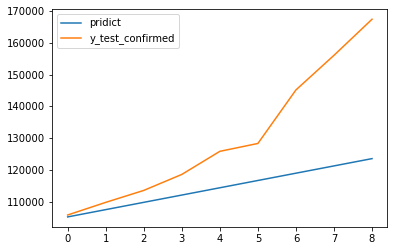

In [36]:
# check against testing data
from sklearn.metrics import mean_squared_error, mean_absolute_error
pred = model.predict(X_test_confirmed)
plt.plot(pred)
plt.plot(y_test_confirmed)
plt.legend(["pridict","y_test_confirmed"])
print('MAE:', mean_absolute_error(pred, y_test_confirmed))
print('MSE:',mean_squared_error(pred, y_test_confirmed))

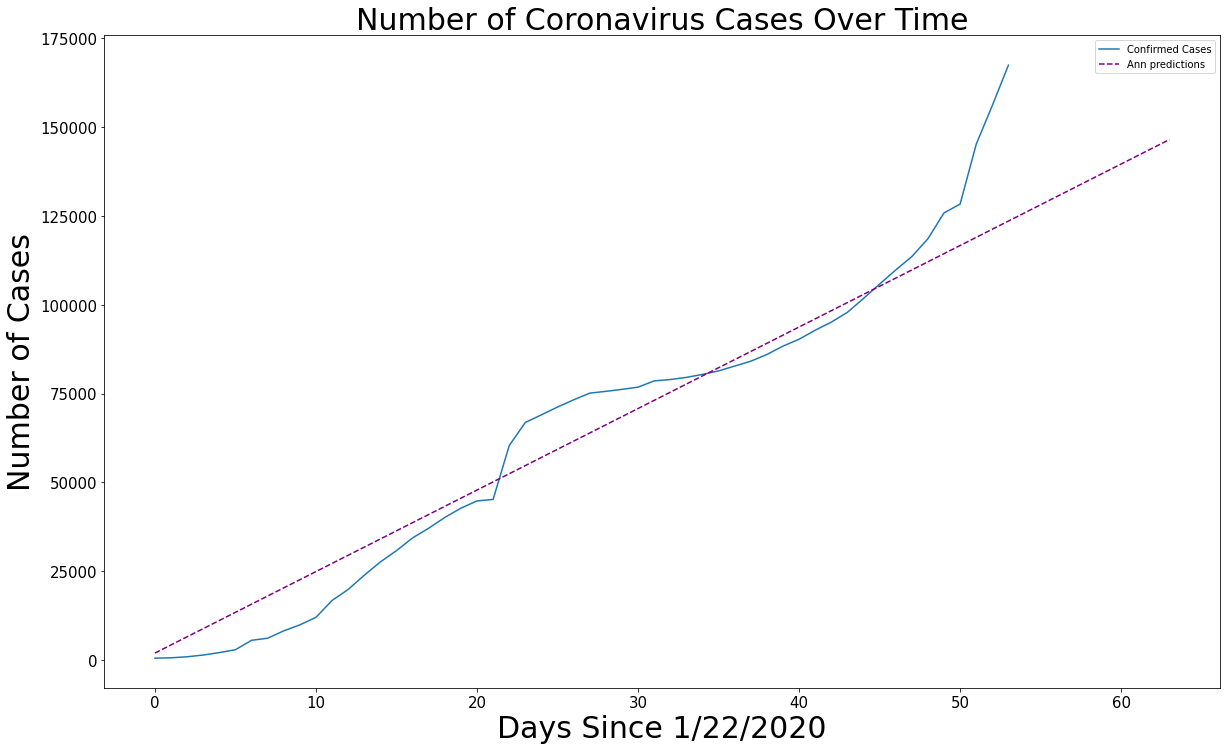

In [37]:
_pred = model.predict(future_forecast)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, _pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Ann predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [105]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forecast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
print('future predictions:')
prd = []
for i in range(len(_pred)):
    prd.append(_pred[i][0])
a = set(zip(future_forcast_dates[-10:], prd[-10:]))
a

future predictions:


{('03/16/2020', 125863.555),
 ('03/17/2020', 128157.66),
 ('03/18/2020', 130451.75),
 ('03/19/2020', 132745.84),
 ('03/20/2020', 135039.95),
 ('03/21/2020', 137334.05),
 ('03/22/2020', 139628.14),
 ('03/23/2020', 141922.25),
 ('03/24/2020', 144216.34),
 ('03/25/2020', 146510.44)}

In [99]:
print(prd)

[]


### Model 1

CNN

Activation relu

optimizer adam



In [38]:

model1 = Sequential()
model1.add(Conv1D(64, 1, activation="linear", input_shape=(1,1)))
model1.add(Flatten())
model1.add(Dense(16, activation="relu"))
model1.add(Dense(50, activation="relu"))
model1.add(Dense(55, activation="relu"))
model1.add(Dense(75, activation="relu"))
model1.add(Dense(67, activation="relu"))
model1.add(Dense(90, activation="relu"))
model1.add(Dense(100, activation="relu"))
model1.add(Dense(100, activation="relu"))
model1.add(Dense(100, activation="relu"))
model1.add(Dense(102, activation="relu"))
model1.add(Dense(50, activation="relu"))
model1.add(Dense(1, activation = "relu"))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             128       
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 50)                850       
                                                                 
 dense_4 (Dense)             (None, 55)                2805      
                                                                 
 dense_5 (Dense)             (None, 75)                4200      
                                                                 
 dense_6 (Dense)             (None, 67)               

In [39]:
model1.compile(optimizer='adam',loss='mean_squared_error',metrics=["accuracy"])

In [40]:
model1.fit(X_train_confirmed, y_train_confirmed, epochs=3000)

Epoch 1/3000
2/2 [==============================] - 1s 0s/step - loss: 3700787712.0000 - accuracy: 0.0000e+00
Epoch 2/3000
2/2 [==============================] - 0s 6ms/step - loss: 3700735744.0000 - accuracy: 0.0000e+00
Epoch 3/3000
2/2 [==============================] - 0s 4ms/step - loss: 3700642816.0000 - accuracy: 0.0000e+00
Epoch 4/3000
2/2 [==============================] - 0s 6ms/step - loss: 3700459776.0000 - accuracy: 0.0000e+00
Epoch 5/3000
2/2 [==============================] - 0s 4ms/step - loss: 3700082432.0000 - accuracy: 0.0000e+00
Epoch 6/3000
2/2 [==============================] - 0s 3ms/step - loss: 3699355136.0000 - accuracy: 0.0000e+00
Epoch 7/3000
2/2 [==============================] - 0s 5ms/step - loss: 3698020608.0000 - accuracy: 0.0000e+00
Epoch 8/3000
2/2 [==============================] - 0s 4ms/step - loss: 3695608576.0000 - accuracy: 0.0000e+00
Epoch 9/3000
2/2 [==============================] - 0s 4ms/step - loss: 3690921984.0000 - accuracy: 0.0000e+00
Ep

2/2 [==============================] - 0s 7ms/step - loss: 47035124.0000 - accuracy: 0.0000e+00
Epoch 150/3000
2/2 [==============================] - 0s 5ms/step - loss: 46581748.0000 - accuracy: 0.0000e+00
Epoch 151/3000
2/2 [==============================] - 0s 4ms/step - loss: 47849552.0000 - accuracy: 0.0000e+00
Epoch 152/3000
2/2 [==============================] - 0s 3ms/step - loss: 47473100.0000 - accuracy: 0.0000e+00
Epoch 153/3000
2/2 [==============================] - 0s 3ms/step - loss: 47162608.0000 - accuracy: 0.0000e+00
Epoch 154/3000
2/2 [==============================] - 0s 4ms/step - loss: 46703344.0000 - accuracy: 0.0000e+00
Epoch 155/3000
2/2 [==============================] - 0s 6ms/step - loss: 46298424.0000 - accuracy: 0.0000e+00
Epoch 156/3000
2/2 [==============================] - 0s 7ms/step - loss: 46925692.0000 - accuracy: 0.0000e+00
Epoch 157/3000
2/2 [==============================] - 0s 6ms/step - loss: 47595524.0000 - accuracy: 0.0000e+00
Epoch 158/3000
2

2/2 [==============================] - 0s 3ms/step - loss: 40268932.0000 - accuracy: 0.0000e+00
Epoch 296/3000
2/2 [==============================] - 0s 4ms/step - loss: 40599728.0000 - accuracy: 0.0000e+00
Epoch 297/3000
2/2 [==============================] - 0s 5ms/step - loss: 39290728.0000 - accuracy: 0.0000e+00
Epoch 298/3000
2/2 [==============================] - 0s 4ms/step - loss: 41470760.0000 - accuracy: 0.0000e+00
Epoch 299/3000
2/2 [==============================] - 0s 6ms/step - loss: 40376828.0000 - accuracy: 0.0000e+00
Epoch 300/3000
2/2 [==============================] - 0s 5ms/step - loss: 39110652.0000 - accuracy: 0.0000e+00
Epoch 301/3000
2/2 [==============================] - 0s 5ms/step - loss: 45618672.0000 - accuracy: 0.0000e+00
Epoch 302/3000
2/2 [==============================] - 0s 5ms/step - loss: 37834744.0000 - accuracy: 0.0000e+00
Epoch 303/3000
2/2 [==============================] - 0s 6ms/step - loss: 52462256.0000 - accuracy: 0.0000e+00
Epoch 304/3000
2

2/2 [==============================] - 0s 4ms/step - loss: 31845432.0000 - accuracy: 0.0000e+00
Epoch 442/3000
2/2 [==============================] - 0s 4ms/step - loss: 30702786.0000 - accuracy: 0.0000e+00
Epoch 443/3000
2/2 [==============================] - 0s 5ms/step - loss: 30960352.0000 - accuracy: 0.0000e+00
Epoch 444/3000
2/2 [==============================] - 0s 4ms/step - loss: 30488082.0000 - accuracy: 0.0000e+00
Epoch 445/3000
2/2 [==============================] - 0s 5ms/step - loss: 30471422.0000 - accuracy: 0.0000e+00
Epoch 446/3000
2/2 [==============================] - 0s 6ms/step - loss: 30468972.0000 - accuracy: 0.0000e+00
Epoch 447/3000
2/2 [==============================] - 0s 6ms/step - loss: 30715344.0000 - accuracy: 0.0000e+00
Epoch 448/3000
2/2 [==============================] - 0s 6ms/step - loss: 30683266.0000 - accuracy: 0.0000e+00
Epoch 449/3000
2/2 [==============================] - 0s 4ms/step - loss: 30761264.0000 - accuracy: 0.0000e+00
Epoch 450/3000
2

2/2 [==============================] - 0s 6ms/step - loss: 23779832.0000 - accuracy: 0.0000e+00
Epoch 588/3000
2/2 [==============================] - 0s 5ms/step - loss: 26031050.0000 - accuracy: 0.0000e+00
Epoch 589/3000
2/2 [==============================] - 0s 6ms/step - loss: 23592932.0000 - accuracy: 0.0000e+00
Epoch 590/3000
2/2 [==============================] - 0s 4ms/step - loss: 24318260.0000 - accuracy: 0.0000e+00
Epoch 591/3000
2/2 [==============================] - 0s 3ms/step - loss: 24579384.0000 - accuracy: 0.0000e+00
Epoch 592/3000
2/2 [==============================] - 0s 4ms/step - loss: 24529704.0000 - accuracy: 0.0000e+00
Epoch 593/3000
2/2 [==============================] - 0s 4ms/step - loss: 24897044.0000 - accuracy: 0.0000e+00
Epoch 594/3000
2/2 [==============================] - 0s 6ms/step - loss: 24951854.0000 - accuracy: 0.0000e+00
Epoch 595/3000
2/2 [==============================] - 0s 3ms/step - loss: 23664376.0000 - accuracy: 0.0000e+00
Epoch 596/3000
2

2/2 [==============================] - 0s 5ms/step - loss: 13740450.0000 - accuracy: 0.0000e+00
Epoch 734/3000
2/2 [==============================] - 0s 5ms/step - loss: 13414622.0000 - accuracy: 0.0000e+00
Epoch 735/3000
2/2 [==============================] - 0s 3ms/step - loss: 12766229.0000 - accuracy: 0.0000e+00
Epoch 736/3000
2/2 [==============================] - 0s 5ms/step - loss: 11708043.0000 - accuracy: 0.0000e+00
Epoch 737/3000
2/2 [==============================] - 0s 5ms/step - loss: 11769038.0000 - accuracy: 0.0000e+00
Epoch 738/3000
2/2 [==============================] - 0s 4ms/step - loss: 11733746.0000 - accuracy: 0.0000e+00
Epoch 739/3000
2/2 [==============================] - 0s 5ms/step - loss: 11637781.0000 - accuracy: 0.0000e+00
Epoch 740/3000
2/2 [==============================] - 0s 3ms/step - loss: 12599286.0000 - accuracy: 0.0000e+00
Epoch 741/3000
2/2 [==============================] - 0s 4ms/step - loss: 11665442.0000 - accuracy: 0.0000e+00
Epoch 742/3000
2

2/2 [==============================] - 0s 4ms/step - loss: 3753679.2500 - accuracy: 0.0000e+00
Epoch 882/3000
2/2 [==============================] - 0s 5ms/step - loss: 4194163.5000 - accuracy: 0.0000e+00
Epoch 883/3000
2/2 [==============================] - 0s 3ms/step - loss: 4254330.0000 - accuracy: 0.0000e+00
Epoch 884/3000
2/2 [==============================] - 0s 5ms/step - loss: 4517499.5000 - accuracy: 0.0000e+00
Epoch 885/3000
2/2 [==============================] - 0s 4ms/step - loss: 4698372.5000 - accuracy: 0.0000e+00
Epoch 886/3000
2/2 [==============================] - 0s 3ms/step - loss: 5069554.0000 - accuracy: 0.0000e+00
Epoch 887/3000
2/2 [==============================] - 0s 5ms/step - loss: 5071457.5000 - accuracy: 0.0000e+00
Epoch 888/3000
2/2 [==============================] - 0s 4ms/step - loss: 5782042.5000 - accuracy: 0.0000e+00
Epoch 889/3000
2/2 [==============================] - 0s 5ms/step - loss: 4260848.5000 - accuracy: 0.0000e+00
Epoch 890/3000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 3480699.7500 - accuracy: 0.0000e+00
Epoch 1030/3000
2/2 [==============================] - 0s 4ms/step - loss: 4257626.5000 - accuracy: 0.0000e+00
Epoch 1031/3000
2/2 [==============================] - 0s 3ms/step - loss: 3179570.2500 - accuracy: 0.0000e+00
Epoch 1032/3000
2/2 [==============================] - 0s 4ms/step - loss: 6299242.5000 - accuracy: 0.0000e+00
Epoch 1033/3000
2/2 [==============================] - 0s 7ms/step - loss: 3090030.5000 - accuracy: 0.0000e+00
Epoch 1034/3000
2/2 [==============================] - 0s 7ms/step - loss: 5383099.5000 - accuracy: 0.0000e+00
Epoch 1035/3000
2/2 [==============================] - 0s 6ms/step - loss: 2373183.2500 - accuracy: 0.0000e+00
Epoch 1036/3000
2/2 [==============================] - 0s 6ms/step - loss: 3792056.2500 - accuracy: 0.0000e+00
Epoch 1037/3000
2/2 [==============================] - 0s 3ms/step - loss: 4190070.5000 - accuracy: 0.0000e+00
Epoch 1038/3000
2

2/2 [==============================] - 0s 4ms/step - loss: 1732537.7500 - accuracy: 0.0000e+00
Epoch 1176/3000
2/2 [==============================] - 0s 3ms/step - loss: 3392986.7500 - accuracy: 0.0000e+00
Epoch 1177/3000
2/2 [==============================] - 0s 4ms/step - loss: 2052387.5000 - accuracy: 0.0000e+00
Epoch 1178/3000
2/2 [==============================] - 0s 6ms/step - loss: 2515855.7500 - accuracy: 0.0000e+00
Epoch 1179/3000
2/2 [==============================] - 0s 6ms/step - loss: 1884214.0000 - accuracy: 0.0000e+00
Epoch 1180/3000
2/2 [==============================] - 0s 5ms/step - loss: 2228783.2500 - accuracy: 0.0000e+00
Epoch 1181/3000
2/2 [==============================] - 0s 6ms/step - loss: 1778517.7500 - accuracy: 0.0000e+00
Epoch 1182/3000
2/2 [==============================] - 0s 5ms/step - loss: 2552802.2500 - accuracy: 0.0000e+00
Epoch 1183/3000
2/2 [==============================] - 0s 4ms/step - loss: 2082406.0000 - accuracy: 0.0000e+00
Epoch 1184/3000
2

2/2 [==============================] - 0s 5ms/step - loss: 1822293.3750 - accuracy: 0.0000e+00
Epoch 1322/3000
2/2 [==============================] - 0s 5ms/step - loss: 1712686.6250 - accuracy: 0.0000e+00
Epoch 1323/3000
2/2 [==============================] - 0s 5ms/step - loss: 1550136.1250 - accuracy: 0.0000e+00
Epoch 1324/3000
2/2 [==============================] - 0s 4ms/step - loss: 1320034.8750 - accuracy: 0.0000e+00
Epoch 1325/3000
2/2 [==============================] - 0s 5ms/step - loss: 1435940.6250 - accuracy: 0.0000e+00
Epoch 1326/3000
2/2 [==============================] - 0s 6ms/step - loss: 1343332.5000 - accuracy: 0.0000e+00
Epoch 1327/3000
2/2 [==============================] - 0s 4ms/step - loss: 1403777.7500 - accuracy: 0.0000e+00
Epoch 1328/3000
2/2 [==============================] - 0s 4ms/step - loss: 2394541.5000 - accuracy: 0.0000e+00
Epoch 1329/3000
2/2 [==============================] - 0s 5ms/step - loss: 1427638.8750 - accuracy: 0.0000e+00
Epoch 1330/3000
2

2/2 [==============================] - 0s 4ms/step - loss: 984727.4375 - accuracy: 0.0000e+00
Epoch 1468/3000
2/2 [==============================] - 0s 6ms/step - loss: 1373153.3750 - accuracy: 0.0000e+00
Epoch 1469/3000
2/2 [==============================] - 0s 5ms/step - loss: 1120419.2500 - accuracy: 0.0000e+00
Epoch 1470/3000
2/2 [==============================] - 0s 4ms/step - loss: 1322230.3750 - accuracy: 0.0000e+00
Epoch 1471/3000
2/2 [==============================] - 0s 5ms/step - loss: 1369438.8750 - accuracy: 0.0000e+00
Epoch 1472/3000
2/2 [==============================] - 0s 4ms/step - loss: 1179956.1250 - accuracy: 0.0000e+00
Epoch 1473/3000
2/2 [==============================] - 0s 6ms/step - loss: 1179426.3750 - accuracy: 0.0000e+00
Epoch 1474/3000
2/2 [==============================] - 0s 4ms/step - loss: 1367654.2500 - accuracy: 0.0000e+00
Epoch 1475/3000
2/2 [==============================] - 0s 5ms/step - loss: 1312494.1250 - accuracy: 0.0000e+00
Epoch 1476/3000
2/

Epoch 1541/3000
2/2 [==============================] - 0s 3ms/step - loss: 2603969.7500 - accuracy: 0.0000e+00
Epoch 1542/3000
2/2 [==============================] - 0s 4ms/step - loss: 1795149.5000 - accuracy: 0.0000e+00
Epoch 1543/3000
2/2 [==============================] - 0s 3ms/step - loss: 1228930.2500 - accuracy: 0.0000e+00
Epoch 1544/3000
2/2 [==============================] - 0s 5ms/step - loss: 1473981.1250 - accuracy: 0.0000e+00
Epoch 1545/3000
2/2 [==============================] - 0s 6ms/step - loss: 1479322.6250 - accuracy: 0.0000e+00
Epoch 1546/3000
2/2 [==============================] - 0s 7ms/step - loss: 1124413.7500 - accuracy: 0.0000e+00
Epoch 1547/3000
2/2 [==============================] - 0s 7ms/step - loss: 1238800.0000 - accuracy: 0.0000e+00
Epoch 1548/3000
2/2 [==============================] - 0s 7ms/step - loss: 1555325.5000 - accuracy: 0.0000e+00
Epoch 1549/3000
2/2 [==============================] - 0s 6ms/step - loss: 2341590.7500 - accuracy: 0.0000e+00
E

2/2 [==============================] - 0s 4ms/step - loss: 6863738.5000 - accuracy: 0.0000e+00
Epoch 1689/3000
2/2 [==============================] - 0s 5ms/step - loss: 2876939.7500 - accuracy: 0.0000e+00
Epoch 1690/3000
2/2 [==============================] - 0s 4ms/step - loss: 4377625.0000 - accuracy: 0.0000e+00
Epoch 1691/3000
2/2 [==============================] - 0s 4ms/step - loss: 9017781.0000 - accuracy: 0.0000e+00
Epoch 1692/3000
2/2 [==============================] - 0s 5ms/step - loss: 5122216.0000 - accuracy: 0.0000e+00
Epoch 1693/3000
2/2 [==============================] - 0s 4ms/step - loss: 3781596.5000 - accuracy: 0.0000e+00
Epoch 1694/3000
2/2 [==============================] - 0s 4ms/step - loss: 2817207.5000 - accuracy: 0.0000e+00
Epoch 1695/3000
2/2 [==============================] - 0s 5ms/step - loss: 4476191.5000 - accuracy: 0.0000e+00
Epoch 1696/3000
2/2 [==============================] - 0s 5ms/step - loss: 5280046.0000 - accuracy: 0.0000e+00
Epoch 1697/3000
2

2/2 [==============================] - 0s 3ms/step - loss: 4442433.5000 - accuracy: 0.0000e+00
Epoch 1763/3000
2/2 [==============================] - 0s 3ms/step - loss: 1360244.3750 - accuracy: 0.0000e+00
Epoch 1764/3000
2/2 [==============================] - 0s 3ms/step - loss: 1450552.7500 - accuracy: 0.0000e+00
Epoch 1765/3000
2/2 [==============================] - 0s 4ms/step - loss: 810728.5625 - accuracy: 0.0000e+00
Epoch 1766/3000
2/2 [==============================] - 0s 5ms/step - loss: 1686434.6250 - accuracy: 0.0000e+00
Epoch 1767/3000
2/2 [==============================] - 0s 4ms/step - loss: 981665.4375 - accuracy: 0.0000e+00
Epoch 1768/3000
2/2 [==============================] - 0s 4ms/step - loss: 724034.8125 - accuracy: 0.0000e+00
Epoch 1769/3000
2/2 [==============================] - 0s 7ms/step - loss: 675801.4375 - accuracy: 0.0000e+00
Epoch 1770/3000
2/2 [==============================] - 0s 3ms/step - loss: 1060235.5000 - accuracy: 0.0000e+00
Epoch 1771/3000
2/2 [

2/2 [==============================] - 0s 3ms/step - loss: 1786383.1250 - accuracy: 0.0000e+00
Epoch 1837/3000
2/2 [==============================] - 0s 3ms/step - loss: 1009691.9375 - accuracy: 0.0000e+00
Epoch 1838/3000
2/2 [==============================] - 0s 3ms/step - loss: 717438.6875 - accuracy: 0.0000e+00
Epoch 1839/3000
2/2 [==============================] - 0s 4ms/step - loss: 833740.1875 - accuracy: 0.0000e+00
Epoch 1840/3000
2/2 [==============================] - 0s 3ms/step - loss: 914259.1250 - accuracy: 0.0000e+00
Epoch 1841/3000
2/2 [==============================] - 0s 5ms/step - loss: 934619.3125 - accuracy: 0.0000e+00
Epoch 1842/3000
2/2 [==============================] - 0s 5ms/step - loss: 1189993.3750 - accuracy: 0.0000e+00
Epoch 1843/3000
2/2 [==============================] - 0s 6ms/step - loss: 958361.9375 - accuracy: 0.0000e+00
Epoch 1844/3000
2/2 [==============================] - 0s 4ms/step - loss: 1467780.0000 - accuracy: 0.0000e+00
Epoch 1845/3000
2/2 [=

2/2 [==============================] - 0s 5ms/step - loss: 1526877.7500 - accuracy: 0.0000e+00
Epoch 1911/3000
2/2 [==============================] - 0s 5ms/step - loss: 958934.6875 - accuracy: 0.0000e+00
Epoch 1912/3000
2/2 [==============================] - 0s 5ms/step - loss: 1465500.0000 - accuracy: 0.0000e+00
Epoch 1913/3000
2/2 [==============================] - 0s 5ms/step - loss: 1291216.0000 - accuracy: 0.0000e+00
Epoch 1914/3000
2/2 [==============================] - 0s 6ms/step - loss: 1156736.1250 - accuracy: 0.0000e+00
Epoch 1915/3000
2/2 [==============================] - 0s 6ms/step - loss: 784094.2500 - accuracy: 0.0000e+00
Epoch 1916/3000
2/2 [==============================] - 0s 2ms/step - loss: 2488657.5000 - accuracy: 0.0000e+00
Epoch 1917/3000
2/2 [==============================] - 0s 5ms/step - loss: 1490843.5000 - accuracy: 0.0000e+00
Epoch 1918/3000
2/2 [==============================] - 0s 4ms/step - loss: 2647904.7500 - accuracy: 0.0000e+00
Epoch 1919/3000
2/2

2/2 [==============================] - 0s 3ms/step - loss: 1723344.7500 - accuracy: 0.0000e+00
Epoch 2059/3000
2/2 [==============================] - 0s 3ms/step - loss: 7751876.5000 - accuracy: 0.0000e+00
Epoch 2060/3000
2/2 [==============================] - 0s 4ms/step - loss: 5729645.0000 - accuracy: 0.0000e+00
Epoch 2061/3000
2/2 [==============================] - 0s 4ms/step - loss: 6364451.5000 - accuracy: 0.0000e+00
Epoch 2062/3000
2/2 [==============================] - 0s 5ms/step - loss: 2384311.0000 - accuracy: 0.0000e+00
Epoch 2063/3000
2/2 [==============================] - 0s 4ms/step - loss: 6267178.5000 - accuracy: 0.0000e+00
Epoch 2064/3000
2/2 [==============================] - 0s 4ms/step - loss: 897417.5000 - accuracy: 0.0000e+00
Epoch 2065/3000
2/2 [==============================] - 0s 5ms/step - loss: 4298771.0000 - accuracy: 0.0000e+00
Epoch 2066/3000
2/2 [==============================] - 0s 4ms/step - loss: 4231771.0000 - accuracy: 0.0000e+00
Epoch 2067/3000
2/

2/2 [==============================] - 0s 5ms/step - loss: 1604158.3750 - accuracy: 0.0000e+00
Epoch 2133/3000
2/2 [==============================] - 0s 6ms/step - loss: 1091172.5000 - accuracy: 0.0000e+00
Epoch 2134/3000
2/2 [==============================] - 0s 4ms/step - loss: 802714.0625 - accuracy: 0.0000e+00
Epoch 2135/3000
2/2 [==============================] - 0s 4ms/step - loss: 1951030.3750 - accuracy: 0.0000e+00
Epoch 2136/3000
2/2 [==============================] - 0s 3ms/step - loss: 1117312.7500 - accuracy: 0.0000e+00
Epoch 2137/3000
2/2 [==============================] - 0s 5ms/step - loss: 994789.2500 - accuracy: 0.0000e+00
Epoch 2138/3000
2/2 [==============================] - 0s 3ms/step - loss: 790616.8750 - accuracy: 0.0000e+00
Epoch 2139/3000
2/2 [==============================] - 0s 4ms/step - loss: 607260.1250 - accuracy: 0.0000e+00
Epoch 2140/3000
2/2 [==============================] - 0s 4ms/step - loss: 766062.5000 - accuracy: 0.0000e+00
Epoch 2141/3000
2/2 [=

2/2 [==============================] - 0s 3ms/step - loss: 980548.0625 - accuracy: 0.0000e+00
Epoch 2281/3000
2/2 [==============================] - 0s 5ms/step - loss: 1414963.7500 - accuracy: 0.0000e+00
Epoch 2282/3000
2/2 [==============================] - 0s 4ms/step - loss: 888098.3125 - accuracy: 0.0000e+00
Epoch 2283/3000
2/2 [==============================] - 0s 5ms/step - loss: 1710803.0000 - accuracy: 0.0000e+00
Epoch 2284/3000
2/2 [==============================] - 0s 4ms/step - loss: 891645.7500 - accuracy: 0.0000e+00
Epoch 2285/3000
2/2 [==============================] - 0s 4ms/step - loss: 1417745.1250 - accuracy: 0.0000e+00
Epoch 2286/3000
2/2 [==============================] - 0s 4ms/step - loss: 814979.5625 - accuracy: 0.0000e+00
Epoch 2287/3000
2/2 [==============================] - 0s 4ms/step - loss: 712443.6250 - accuracy: 0.0000e+00
Epoch 2288/3000
2/2 [==============================] - 0s 3ms/step - loss: 516768.9375 - accuracy: 0.0000e+00
Epoch 2289/3000
2/2 [==

2/2 [==============================] - 0s 3ms/step - loss: 2171427.0000 - accuracy: 0.0000e+00
Epoch 2355/3000
2/2 [==============================] - 0s 5ms/step - loss: 2178048.7500 - accuracy: 0.0000e+00
Epoch 2356/3000
2/2 [==============================] - 0s 3ms/step - loss: 2587686.7500 - accuracy: 0.0000e+00
Epoch 2357/3000
2/2 [==============================] - 0s 5ms/step - loss: 1251722.8750 - accuracy: 0.0000e+00
Epoch 2358/3000
2/2 [==============================] - 0s 3ms/step - loss: 2202415.2500 - accuracy: 0.0000e+00
Epoch 2359/3000
2/2 [==============================] - 0s 3ms/step - loss: 2966941.0000 - accuracy: 0.0000e+00
Epoch 2360/3000
2/2 [==============================] - 0s 5ms/step - loss: 3431211.5000 - accuracy: 0.0000e+00
Epoch 2361/3000
2/2 [==============================] - 0s 4ms/step - loss: 1458444.2500 - accuracy: 0.0000e+00
Epoch 2362/3000
2/2 [==============================] - 0s 4ms/step - loss: 4331390.5000 - accuracy: 0.0000e+00
Epoch 2363/3000
2

2/2 [==============================] - 0s 5ms/step - loss: 1201371.5000 - accuracy: 0.0000e+00
Epoch 2429/3000
2/2 [==============================] - 0s 4ms/step - loss: 602063.2500 - accuracy: 0.0000e+00
Epoch 2430/3000
2/2 [==============================] - 0s 6ms/step - loss: 1044693.2500 - accuracy: 0.0000e+00
Epoch 2431/3000
2/2 [==============================] - 0s 5ms/step - loss: 619986.7500 - accuracy: 0.0000e+00
Epoch 2432/3000
2/2 [==============================] - 0s 4ms/step - loss: 616561.0000 - accuracy: 0.0000e+00
Epoch 2433/3000
2/2 [==============================] - 0s 3ms/step - loss: 936762.9375 - accuracy: 0.0000e+00
Epoch 2434/3000
2/2 [==============================] - 0s 6ms/step - loss: 747085.0625 - accuracy: 0.0000e+00
Epoch 2435/3000
2/2 [==============================] - 0s 6ms/step - loss: 691403.1250 - accuracy: 0.0000e+00
Epoch 2436/3000
2/2 [==============================] - 0s 5ms/step - loss: 814894.7500 - accuracy: 0.0000e+00
Epoch 2437/3000
2/2 [===

2/2 [==============================] - 0s 5ms/step - loss: 2304369.0000 - accuracy: 0.0000e+00
Epoch 2577/3000
2/2 [==============================] - 0s 6ms/step - loss: 1584342.2500 - accuracy: 0.0000e+00
Epoch 2578/3000
2/2 [==============================] - 0s 5ms/step - loss: 5358407.0000 - accuracy: 0.0000e+00
Epoch 2579/3000
2/2 [==============================] - 0s 4ms/step - loss: 2888879.2500 - accuracy: 0.0000e+00
Epoch 2580/3000
2/2 [==============================] - 0s 6ms/step - loss: 1478470.2500 - accuracy: 0.0000e+00
Epoch 2581/3000
2/2 [==============================] - 0s 5ms/step - loss: 2480522.0000 - accuracy: 0.0000e+00
Epoch 2582/3000
2/2 [==============================] - 0s 5ms/step - loss: 580445.3125 - accuracy: 0.0000e+00
Epoch 2583/3000
2/2 [==============================] - 0s 5ms/step - loss: 1618355.5000 - accuracy: 0.0000e+00
Epoch 2584/3000
2/2 [==============================] - 0s 4ms/step - loss: 1437549.6250 - accuracy: 0.0000e+00
Epoch 2585/3000
2/

2/2 [==============================] - 0s 5ms/step - loss: 2434948.0000 - accuracy: 0.0000e+00
Epoch 2725/3000
2/2 [==============================] - 0s 5ms/step - loss: 1565135.6250 - accuracy: 0.0000e+00
Epoch 2726/3000
2/2 [==============================] - 0s 5ms/step - loss: 1109773.3750 - accuracy: 0.0000e+00
Epoch 2727/3000
2/2 [==============================] - 0s 2ms/step - loss: 1085111.5000 - accuracy: 0.0000e+00
Epoch 2728/3000
2/2 [==============================] - 0s 5ms/step - loss: 404624.6562 - accuracy: 0.0000e+00
Epoch 2729/3000
2/2 [==============================] - 0s 4ms/step - loss: 961889.0625 - accuracy: 0.0000e+00
Epoch 2730/3000
2/2 [==============================] - 0s 4ms/step - loss: 1577219.3750 - accuracy: 0.0000e+00
Epoch 2731/3000
2/2 [==============================] - 0s 4ms/step - loss: 1273998.5000 - accuracy: 0.0000e+00
Epoch 2732/3000
2/2 [==============================] - 0s 5ms/step - loss: 1220997.5000 - accuracy: 0.0000e+00
Epoch 2733/3000
2/2

2/2 [==============================] - 0s 4ms/step - loss: 446183.8125 - accuracy: 0.0000e+00
Epoch 2873/3000
2/2 [==============================] - 0s 3ms/step - loss: 811438.9375 - accuracy: 0.0000e+00
Epoch 2874/3000
2/2 [==============================] - 0s 5ms/step - loss: 375929.4688 - accuracy: 0.0000e+00
Epoch 2875/3000
2/2 [==============================] - 0s 6ms/step - loss: 518822.0938 - accuracy: 0.0000e+00
Epoch 2876/3000
2/2 [==============================] - 0s 6ms/step - loss: 552319.0625 - accuracy: 0.0000e+00
Epoch 2877/3000
2/2 [==============================] - 0s 6ms/step - loss: 435506.0938 - accuracy: 0.0000e+00
Epoch 2878/3000
2/2 [==============================] - 0s 5ms/step - loss: 668020.5625 - accuracy: 0.0000e+00
Epoch 2879/3000
2/2 [==============================] - 0s 4ms/step - loss: 537031.0000 - accuracy: 0.0000e+00
Epoch 2880/3000
2/2 [==============================] - 0s 4ms/step - loss: 720567.9375 - accuracy: 0.0000e+00
Epoch 2881/3000
2/2 [=====

MAE: 19166.546006944445
MSE: 589270267.2211168


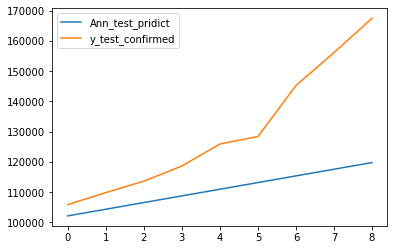

In [41]:
# check against testing data
from sklearn.metrics import mean_squared_error, mean_absolute_error
Ann_test_pred = model1.predict(X_test_confirmed)
plt.plot(Ann_test_pred)
plt.plot(y_test_confirmed)
plt.legend(["Ann_test_pridict","y_test_confirmed"])
print('MAE:', mean_absolute_error(Ann_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(Ann_test_pred, y_test_confirmed))

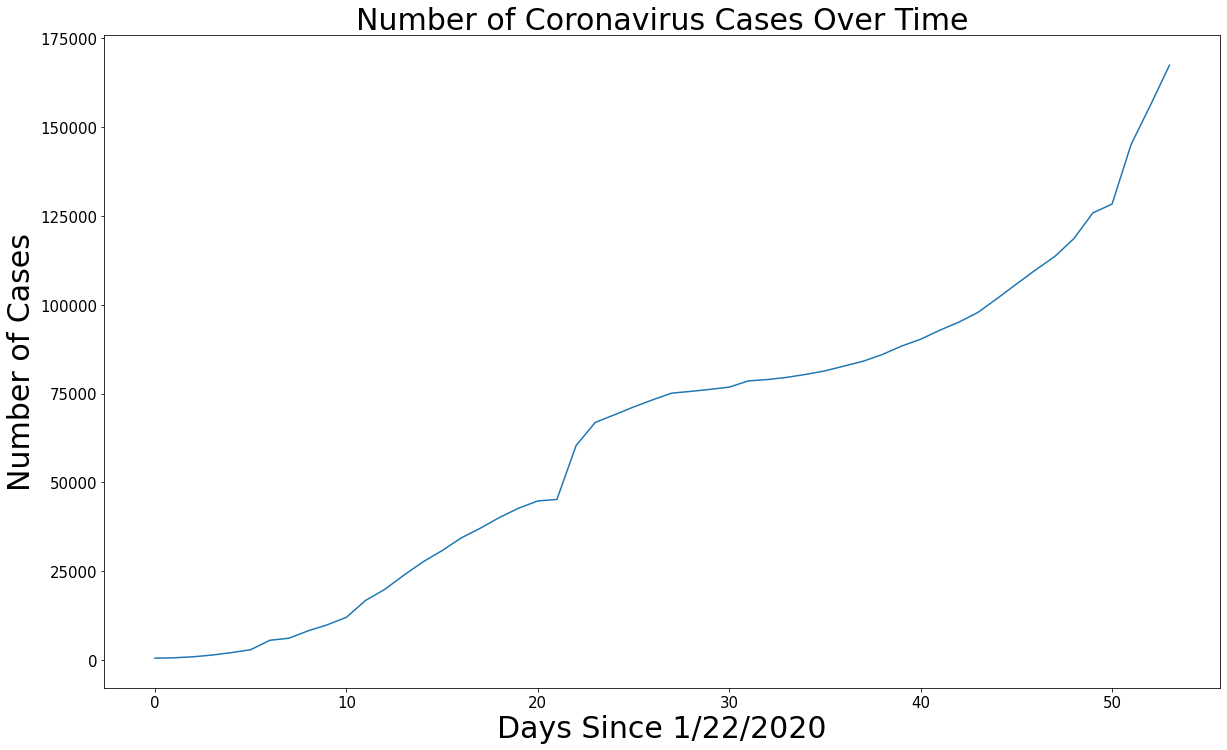

In [43]:
# Total Number of coronavirus cases over time

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

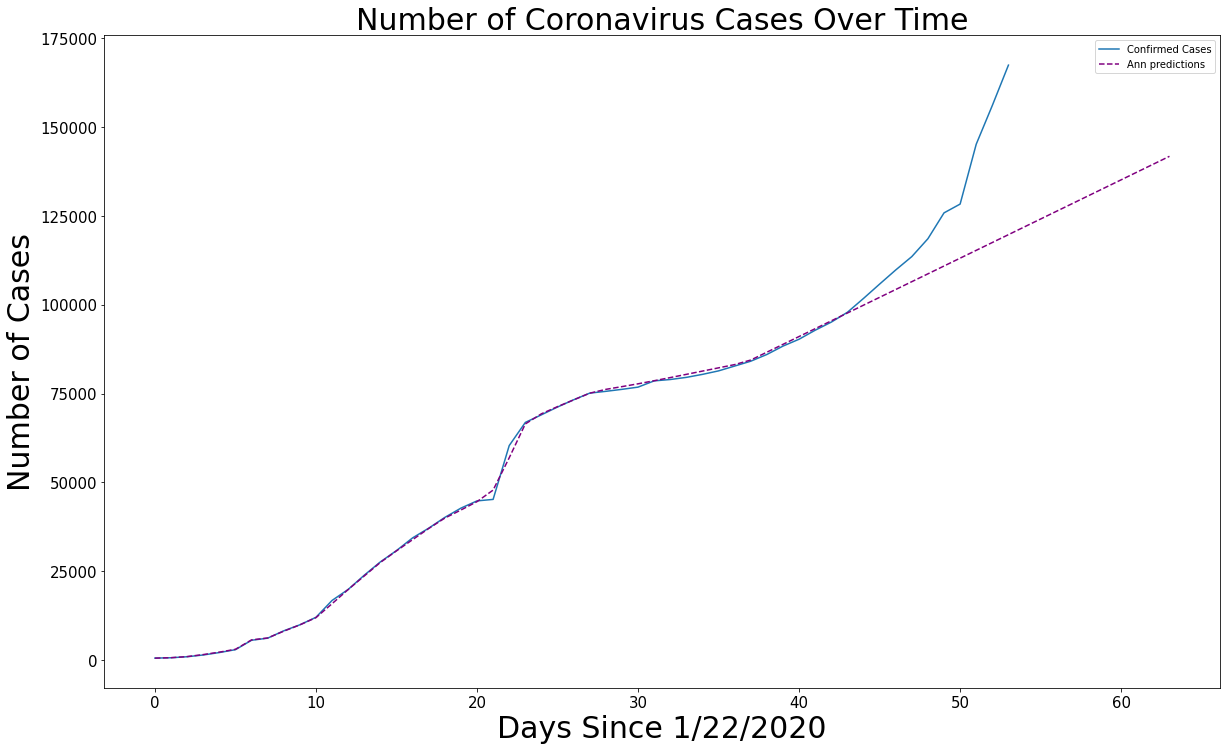

In [44]:
# Confirmed vs Predicted cases
Ann_pred = model1.predict(future_forecast)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, Ann_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Ann predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [104]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forecast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
print('future predictions:')
prd1 = []
for i in range(len(Ann_pred)):
    prd1.append(Ann_pred[i][0])
a1 = set(zip(future_forcast_dates[-10:], prd1[-10:]))
a1

future predictions:


{('03/16/2020', 121939.15),
 ('03/17/2020', 124144.42),
 ('03/18/2020', 126349.664),
 ('03/19/2020', 128554.86),
 ('03/20/2020', 130760.11),
 ('03/21/2020', 132965.34),
 ('03/22/2020', 135170.56),
 ('03/23/2020', 137375.83),
 ('03/24/2020', 139581.05),
 ('03/25/2020', 141786.28)}

### MOdel 2

Basic neural network with many hidden layer

Activation function: Linear 

optimizer: RMSprop



In [50]:
linear_model = tf.keras.Sequential()

# hidden layers
linear_model.add(tf.keras.layers.Dense(69, activation='linear', input_dim =1))
linear_model.add(tf.keras.layers.Dense(50, activation='linear'))
linear_model.add(tf.keras.layers.Dense(55, activation='linear'))
linear_model.add(tf.keras.layers.Dense(75, activation='linear'))
linear_model.add(tf.keras.layers.Dense(67, activation='linear'))
linear_model.add(tf.keras.layers.Dense(90, activation='linear'))
linear_model.add(tf.keras.layers.Dense(54, activation='linear'))

# output layer
linear_model.add(tf.keras.layers.Dense(1, activation='linear'))
optim = tf.keras.optimizers.RMSprop(learning_rate = 0.001, rho = 0.9)

In [56]:
linear_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 69)                138       
                                                                 
 dense_31 (Dense)            (None, 50)                3500      
                                                                 
 dense_32 (Dense)            (None, 55)                2805      
                                                                 
 dense_33 (Dense)            (None, 75)                4200      
                                                                 
 dense_34 (Dense)            (None, 67)                5092      
                                                                 
 dense_35 (Dense)            (None, 90)                6120      
                                                                 
 dense_36 (Dense)            (None, 54)               

In [52]:
linear_model.compile(optimizer=optim,loss='mean_squared_error',metrics=["accuracy"])

In [53]:
linear_model.fit(X_train_confirmed, y_train_confirmed, epochs=3000)

Epoch 1/3000
2/2 [==============================] - 1s 0s/step - loss: 3699235584.0000 - accuracy: 0.0000e+00
Epoch 2/3000
2/2 [==============================] - 0s 4ms/step - loss: 3682756096.0000 - accuracy: 0.0000e+00
Epoch 3/3000
2/2 [==============================] - 0s 4ms/step - loss: 3633496320.0000 - accuracy: 0.0000e+00
Epoch 4/3000
2/2 [==============================] - 0s 4ms/step - loss: 3506408960.0000 - accuracy: 0.0000e+00
Epoch 5/3000
2/2 [==============================] - 0s 4ms/step - loss: 3230997248.0000 - accuracy: 0.0000e+00
Epoch 6/3000
2/2 [==============================] - 0s 3ms/step - loss: 2700224512.0000 - accuracy: 0.0000e+00
Epoch 7/3000
2/2 [==============================] - 0s 5ms/step - loss: 1868673664.0000 - accuracy: 0.0000e+00
Epoch 8/3000
2/2 [==============================] - 0s 5ms/step - loss: 936827200.0000 - accuracy: 0.0000e+00
Epoch 9/3000
2/2 [==============================] - 0s 4ms/step - loss: 270941248.0000 - accuracy: 0.0000e+00
Epoc

2/2 [==============================] - 0s 3ms/step - loss: 53776824.0000 - accuracy: 0.0000e+00
Epoch 148/3000
2/2 [==============================] - 0s 3ms/step - loss: 60218696.0000 - accuracy: 0.0000e+00
Epoch 149/3000
2/2 [==============================] - 0s 3ms/step - loss: 76509280.0000 - accuracy: 0.0000e+00
Epoch 150/3000
2/2 [==============================] - 0s 3ms/step - loss: 50481744.0000 - accuracy: 0.0000e+00
Epoch 151/3000
2/2 [==============================] - 0s 3ms/step - loss: 54789604.0000 - accuracy: 0.0000e+00
Epoch 152/3000
2/2 [==============================] - 0s 4ms/step - loss: 62530940.0000 - accuracy: 0.0000e+00
Epoch 153/3000
2/2 [==============================] - 0s 4ms/step - loss: 81240208.0000 - accuracy: 0.0000e+00
Epoch 154/3000
2/2 [==============================] - 0s 3ms/step - loss: 96183112.0000 - accuracy: 0.0000e+00
Epoch 155/3000
2/2 [==============================] - 0s 3ms/step - loss: 46013236.0000 - accuracy: 0.0000e+00
Epoch 156/3000
2

2/2 [==============================] - 0s 2ms/step - loss: 70169144.0000 - accuracy: 0.0000e+00
Epoch 294/3000
2/2 [==============================] - 0s 4ms/step - loss: 44939560.0000 - accuracy: 0.0000e+00
Epoch 295/3000
2/2 [==============================] - 0s 5ms/step - loss: 67044124.0000 - accuracy: 0.0000e+00
Epoch 296/3000
2/2 [==============================] - 0s 5ms/step - loss: 92864760.0000 - accuracy: 0.0000e+00
Epoch 297/3000
2/2 [==============================] - 0s 6ms/step - loss: 74373144.0000 - accuracy: 0.0000e+00
Epoch 298/3000
2/2 [==============================] - 0s 2ms/step - loss: 56229932.0000 - accuracy: 0.0000e+00
Epoch 299/3000
2/2 [==============================] - 0s 4ms/step - loss: 46493916.0000 - accuracy: 0.0000e+00
Epoch 300/3000
2/2 [==============================] - 0s 3ms/step - loss: 48277944.0000 - accuracy: 0.0000e+00
Epoch 301/3000
2/2 [==============================] - 0s 5ms/step - loss: 43972156.0000 - accuracy: 0.0000e+00
Epoch 302/3000
2

2/2 [==============================] - 0s 3ms/step - loss: 64843448.0000 - accuracy: 0.0000e+00
Epoch 440/3000
2/2 [==============================] - 0s 4ms/step - loss: 41667116.0000 - accuracy: 0.0000e+00
Epoch 441/3000
2/2 [==============================] - 0s 3ms/step - loss: 43112136.0000 - accuracy: 0.0000e+00
Epoch 442/3000
2/2 [==============================] - 0s 5ms/step - loss: 43107156.0000 - accuracy: 0.0000e+00
Epoch 443/3000
2/2 [==============================] - 0s 2ms/step - loss: 74862472.0000 - accuracy: 0.0000e+00
Epoch 444/3000
2/2 [==============================] - 0s 5ms/step - loss: 79798360.0000 - accuracy: 0.0000e+00
Epoch 445/3000
2/2 [==============================] - 0s 2ms/step - loss: 52556196.0000 - accuracy: 0.0000e+00
Epoch 446/3000
2/2 [==============================] - 0s 3ms/step - loss: 80010232.0000 - accuracy: 0.0000e+00
Epoch 447/3000
2/2 [==============================] - 0s 3ms/step - loss: 72738320.0000 - accuracy: 0.0000e+00
Epoch 448/3000
2

2/2 [==============================] - 0s 5ms/step - loss: 40780304.0000 - accuracy: 0.0000e+00
Epoch 586/3000
2/2 [==============================] - 0s 5ms/step - loss: 49054400.0000 - accuracy: 0.0000e+00
Epoch 587/3000
2/2 [==============================] - 0s 6ms/step - loss: 86152112.0000 - accuracy: 0.0000e+00
Epoch 588/3000
2/2 [==============================] - 0s 4ms/step - loss: 43734160.0000 - accuracy: 0.0000e+00
Epoch 589/3000
2/2 [==============================] - 0s 3ms/step - loss: 41250032.0000 - accuracy: 0.0000e+00
Epoch 590/3000
2/2 [==============================] - 0s 3ms/step - loss: 43986700.0000 - accuracy: 0.0000e+00
Epoch 591/3000
2/2 [==============================] - 0s 3ms/step - loss: 57973532.0000 - accuracy: 0.0000e+00
Epoch 592/3000
2/2 [==============================] - 0s 3ms/step - loss: 124534440.0000 - accuracy: 0.0000e+00
Epoch 593/3000
2/2 [==============================] - 0s 3ms/step - loss: 40822500.0000 - accuracy: 0.0000e+00
Epoch 594/3000


2/2 [==============================] - 0s 4ms/step - loss: 133893040.0000 - accuracy: 0.0000e+00
Epoch 732/3000
2/2 [==============================] - 0s 3ms/step - loss: 56476240.0000 - accuracy: 0.0000e+00
Epoch 733/3000
2/2 [==============================] - 0s 4ms/step - loss: 46424856.0000 - accuracy: 0.0000e+00
Epoch 734/3000
2/2 [==============================] - 0s 3ms/step - loss: 53423000.0000 - accuracy: 0.0000e+00
Epoch 735/3000
2/2 [==============================] - 0s 4ms/step - loss: 58954244.0000 - accuracy: 0.0000e+00
Epoch 736/3000
2/2 [==============================] - 0s 3ms/step - loss: 48533704.0000 - accuracy: 0.0000e+00
Epoch 737/3000
2/2 [==============================] - 0s 3ms/step - loss: 42919812.0000 - accuracy: 0.0000e+00
Epoch 738/3000
2/2 [==============================] - 0s 2ms/step - loss: 52857468.0000 - accuracy: 0.0000e+00
Epoch 739/3000
2/2 [==============================] - 0s 4ms/step - loss: 94135584.0000 - accuracy: 0.0000e+00
Epoch 740/3000


2/2 [==============================] - 0s 4ms/step - loss: 58969032.0000 - accuracy: 0.0000e+00
Epoch 878/3000
2/2 [==============================] - 0s 3ms/step - loss: 43107344.0000 - accuracy: 0.0000e+00
Epoch 879/3000
2/2 [==============================] - 0s 3ms/step - loss: 42446084.0000 - accuracy: 0.0000e+00
Epoch 880/3000
2/2 [==============================] - 0s 3ms/step - loss: 40552580.0000 - accuracy: 0.0000e+00
Epoch 881/3000
2/2 [==============================] - 0s 4ms/step - loss: 58136236.0000 - accuracy: 0.0000e+00
Epoch 882/3000
2/2 [==============================] - 0s 3ms/step - loss: 69712256.0000 - accuracy: 0.0000e+00
Epoch 883/3000
2/2 [==============================] - 0s 4ms/step - loss: 67907376.0000 - accuracy: 0.0000e+00
Epoch 884/3000
2/2 [==============================] - 0s 3ms/step - loss: 53107780.0000 - accuracy: 0.0000e+00
Epoch 885/3000
2/2 [==============================] - 0s 3ms/step - loss: 64724328.0000 - accuracy: 0.0000e+00
Epoch 886/3000
2

2/2 [==============================] - 0s 3ms/step - loss: 70739448.0000 - accuracy: 0.0000e+00
Epoch 1024/3000
2/2 [==============================] - 0s 4ms/step - loss: 60554632.0000 - accuracy: 0.0000e+00
Epoch 1025/3000
2/2 [==============================] - 0s 2ms/step - loss: 49857296.0000 - accuracy: 0.0000e+00
Epoch 1026/3000
2/2 [==============================] - 0s 3ms/step - loss: 69264472.0000 - accuracy: 0.0000e+00
Epoch 1027/3000
2/2 [==============================] - 0s 3ms/step - loss: 54310376.0000 - accuracy: 0.0000e+00
Epoch 1028/3000
2/2 [==============================] - 0s 4ms/step - loss: 47773916.0000 - accuracy: 0.0000e+00
Epoch 1029/3000
2/2 [==============================] - 0s 5ms/step - loss: 60883444.0000 - accuracy: 0.0000e+00
Epoch 1030/3000
2/2 [==============================] - 0s 4ms/step - loss: 42068740.0000 - accuracy: 0.0000e+00
Epoch 1031/3000
2/2 [==============================] - 0s 4ms/step - loss: 40570396.0000 - accuracy: 0.0000e+00
Epoch 10

2/2 [==============================] - 0s 4ms/step - loss: 55721308.0000 - accuracy: 0.0000e+00
Epoch 1170/3000
2/2 [==============================] - 0s 4ms/step - loss: 64201960.0000 - accuracy: 0.0000e+00
Epoch 1171/3000
2/2 [==============================] - 0s 3ms/step - loss: 44314952.0000 - accuracy: 0.0000e+00
Epoch 1172/3000
2/2 [==============================] - 0s 5ms/step - loss: 41486648.0000 - accuracy: 0.0000e+00
Epoch 1173/3000
2/2 [==============================] - 0s 2ms/step - loss: 44870748.0000 - accuracy: 0.0000e+00
Epoch 1174/3000
2/2 [==============================] - 0s 3ms/step - loss: 64964016.0000 - accuracy: 0.0000e+00
Epoch 1175/3000
2/2 [==============================] - 0s 2ms/step - loss: 65321932.0000 - accuracy: 0.0000e+00
Epoch 1176/3000
2/2 [==============================] - 0s 2ms/step - loss: 52025208.0000 - accuracy: 0.0000e+00
Epoch 1177/3000
2/2 [==============================] - 0s 3ms/step - loss: 48024508.0000 - accuracy: 0.0000e+00
Epoch 11

2/2 [==============================] - 0s 16ms/step - loss: 42219720.0000 - accuracy: 0.0000e+00
Epoch 1316/3000
2/2 [==============================] - 0s 0s/step - loss: 50233764.0000 - accuracy: 0.0000e+00
Epoch 1317/3000
2/2 [==============================] - 0s 0s/step - loss: 56505452.0000 - accuracy: 0.0000e+00
Epoch 1318/3000
2/2 [==============================] - 0s 0s/step - loss: 40729852.0000 - accuracy: 0.0000e+00
Epoch 1319/3000
2/2 [==============================] - 0s 9ms/step - loss: 48633260.0000 - accuracy: 0.0000e+00
Epoch 1320/3000
2/2 [==============================] - 0s 0s/step - loss: 41534080.0000 - accuracy: 0.0000e+00
Epoch 1321/3000
2/2 [==============================] - 0s 16ms/step - loss: 41208856.0000 - accuracy: 0.0000e+00
Epoch 1322/3000
2/2 [==============================] - 0s 0s/step - loss: 97268600.0000 - accuracy: 0.0000e+00
Epoch 1323/3000
2/2 [==============================] - 0s 0s/step - loss: 46707188.0000 - accuracy: 0.0000e+00
Epoch 1324/3

2/2 [==============================] - 0s 4ms/step - loss: 47402700.0000 - accuracy: 0.0000e+00
Epoch 1462/3000
2/2 [==============================] - 0s 3ms/step - loss: 85063712.0000 - accuracy: 0.0000e+00
Epoch 1463/3000
2/2 [==============================] - 0s 4ms/step - loss: 63289924.0000 - accuracy: 0.0000e+00
Epoch 1464/3000
2/2 [==============================] - 0s 3ms/step - loss: 40696628.0000 - accuracy: 0.0000e+00
Epoch 1465/3000
2/2 [==============================] - 0s 2ms/step - loss: 49591672.0000 - accuracy: 0.0000e+00
Epoch 1466/3000
2/2 [==============================] - 0s 5ms/step - loss: 78198656.0000 - accuracy: 0.0000e+00
Epoch 1467/3000
2/2 [==============================] - 0s 5ms/step - loss: 41608120.0000 - accuracy: 0.0000e+00
Epoch 1468/3000
2/2 [==============================] - 0s 3ms/step - loss: 40697000.0000 - accuracy: 0.0000e+00
Epoch 1469/3000
2/2 [==============================] - 0s 2ms/step - loss: 40587088.0000 - accuracy: 0.0000e+00
Epoch 14

2/2 [==============================] - 0s 16ms/step - loss: 40853316.0000 - accuracy: 0.0000e+00
Epoch 1608/3000
2/2 [==============================] - 0s 15ms/step - loss: 54370208.0000 - accuracy: 0.0000e+00
Epoch 1609/3000
2/2 [==============================] - 0s 0s/step - loss: 55936252.0000 - accuracy: 0.0000e+00
Epoch 1610/3000
2/2 [==============================] - 0s 0s/step - loss: 67722648.0000 - accuracy: 0.0000e+00
Epoch 1611/3000
2/2 [==============================] - 0s 0s/step - loss: 42019168.0000 - accuracy: 0.0000e+00
Epoch 1612/3000
2/2 [==============================] - 0s 0s/step - loss: 40559692.0000 - accuracy: 0.0000e+00
Epoch 1613/3000
2/2 [==============================] - 0s 0s/step - loss: 66642948.0000 - accuracy: 0.0000e+00
Epoch 1614/3000
2/2 [==============================] - 0s 0s/step - loss: 48018172.0000 - accuracy: 0.0000e+00
Epoch 1615/3000
2/2 [==============================] - 0s 16ms/step - loss: 41007532.0000 - accuracy: 0.0000e+00
Epoch 1616/

2/2 [==============================] - 0s 0s/step - loss: 47800480.0000 - accuracy: 0.0000e+00
Epoch 1754/3000
2/2 [==============================] - 0s 0s/step - loss: 48878956.0000 - accuracy: 0.0000e+00
Epoch 1755/3000
2/2 [==============================] - 0s 0s/step - loss: 52790852.0000 - accuracy: 0.0000e+00
Epoch 1756/3000
2/2 [==============================] - 0s 3ms/step - loss: 44830740.0000 - accuracy: 0.0000e+00
Epoch 1757/3000
2/2 [==============================] - 0s 17ms/step - loss: 40572280.0000 - accuracy: 0.0000e+00
Epoch 1758/3000
2/2 [==============================] - 0s 0s/step - loss: 50874344.0000 - accuracy: 0.0000e+00
Epoch 1759/3000
2/2 [==============================] - 0s 0s/step - loss: 51649992.0000 - accuracy: 0.0000e+00
Epoch 1760/3000
2/2 [==============================] - 0s 0s/step - loss: 40794572.0000 - accuracy: 0.0000e+00
Epoch 1761/3000
2/2 [==============================] - 0s 16ms/step - loss: 44437468.0000 - accuracy: 0.0000e+00
Epoch 1762/3

2/2 [==============================] - 0s 4ms/step - loss: 49275688.0000 - accuracy: 0.0000e+00
Epoch 1900/3000
2/2 [==============================] - 0s 4ms/step - loss: 41572976.0000 - accuracy: 0.0000e+00
Epoch 1901/3000
2/2 [==============================] - 0s 6ms/step - loss: 44318544.0000 - accuracy: 0.0000e+00
Epoch 1902/3000
2/2 [==============================] - 0s 5ms/step - loss: 53473336.0000 - accuracy: 0.0000e+00
Epoch 1903/3000
2/2 [==============================] - 0s 5ms/step - loss: 40030396.0000 - accuracy: 0.0000e+00
Epoch 1904/3000
2/2 [==============================] - 0s 6ms/step - loss: 125022856.0000 - accuracy: 0.0000e+00
Epoch 1905/3000
2/2 [==============================] - 0s 4ms/step - loss: 41321340.0000 - accuracy: 0.0000e+00
Epoch 1906/3000
2/2 [==============================] - 0s 0s/step - loss: 41820096.0000 - accuracy: 0.0000e+00
Epoch 1907/3000
2/2 [==============================] - 0s 0s/step - loss: 40921852.0000 - accuracy: 0.0000e+00
Epoch 190

2/2 [==============================] - 0s 9ms/step - loss: 42615416.0000 - accuracy: 0.0000e+00
Epoch 2046/3000
2/2 [==============================] - 0s 0s/step - loss: 40401680.0000 - accuracy: 0.0000e+00
Epoch 2047/3000
2/2 [==============================] - 0s 0s/step - loss: 69725512.0000 - accuracy: 0.0000e+00
Epoch 2048/3000
2/2 [==============================] - 0s 16ms/step - loss: 57133408.0000 - accuracy: 0.0000e+00
Epoch 2049/3000
2/2 [==============================] - 0s 16ms/step - loss: 42238396.0000 - accuracy: 0.0000e+00
Epoch 2050/3000
2/2 [==============================] - 0s 0s/step - loss: 41762636.0000 - accuracy: 0.0000e+00
Epoch 2051/3000
2/2 [==============================] - 0s 0s/step - loss: 55071996.0000 - accuracy: 0.0000e+00
Epoch 2052/3000
2/2 [==============================] - 0s 0s/step - loss: 42644812.0000 - accuracy: 0.0000e+00
Epoch 2053/3000
2/2 [==============================] - 0s 0s/step - loss: 78064544.0000 - accuracy: 0.0000e+00
Epoch 2054/3

2/2 [==============================] - 0s 0s/step - loss: 40662112.0000 - accuracy: 0.0000e+00
Epoch 2192/3000
2/2 [==============================] - 0s 9ms/step - loss: 41797852.0000 - accuracy: 0.0000e+00
Epoch 2193/3000
2/2 [==============================] - 0s 0s/step - loss: 57862560.0000 - accuracy: 0.0000e+00
Epoch 2194/3000
2/2 [==============================] - 0s 0s/step - loss: 45377596.0000 - accuracy: 0.0000e+00
Epoch 2195/3000
2/2 [==============================] - 0s 16ms/step - loss: 58733808.0000 - accuracy: 0.0000e+00
Epoch 2196/3000
2/2 [==============================] - 0s 16ms/step - loss: 48837064.0000 - accuracy: 0.0000e+00
Epoch 2197/3000
2/2 [==============================] - 0s 4ms/step - loss: 44162612.0000 - accuracy: 0.0000e+00
Epoch 2198/3000
2/2 [==============================] - 0s 0s/step - loss: 42409144.0000 - accuracy: 0.0000e+00
Epoch 2199/3000
2/2 [==============================] - 0s 0s/step - loss: 107860040.0000 - accuracy: 0.0000e+00
Epoch 2200

2/2 [==============================] - 0s 16ms/step - loss: 47801320.0000 - accuracy: 0.0000e+00
Epoch 2265/3000
2/2 [==============================] - 0s 0s/step - loss: 112926848.0000 - accuracy: 0.0000e+00
Epoch 2266/3000
2/2 [==============================] - 0s 0s/step - loss: 54553252.0000 - accuracy: 0.0000e+00
Epoch 2267/3000
2/2 [==============================] - 0s 14ms/step - loss: 41953060.0000 - accuracy: 0.0000e+00
Epoch 2268/3000
2/2 [==============================] - 0s 0s/step - loss: 40632556.0000 - accuracy: 0.0000e+00
Epoch 2269/3000
2/2 [==============================] - 0s 0s/step - loss: 47017204.0000 - accuracy: 0.0000e+00
Epoch 2270/3000
2/2 [==============================] - 0s 0s/step - loss: 48651600.0000 - accuracy: 0.0000e+00
Epoch 2271/3000
2/2 [==============================] - 0s 0s/step - loss: 57189080.0000 - accuracy: 0.0000e+00
Epoch 2272/3000
2/2 [==============================] - 0s 0s/step - loss: 63606284.0000 - accuracy: 0.0000e+00
Epoch 2273/3

2/2 [==============================] - 0s 0s/step - loss: 43520656.0000 - accuracy: 0.0000e+00
Epoch 2338/3000
2/2 [==============================] - 0s 0s/step - loss: 48519260.0000 - accuracy: 0.0000e+00
Epoch 2339/3000
2/2 [==============================] - 0s 0s/step - loss: 70473072.0000 - accuracy: 0.0000e+00
Epoch 2340/3000
2/2 [==============================] - 0s 18ms/step - loss: 60299100.0000 - accuracy: 0.0000e+00
Epoch 2341/3000
2/2 [==============================] - 0s 0s/step - loss: 41090580.0000 - accuracy: 0.0000e+00
Epoch 2342/3000
2/2 [==============================] - 0s 0s/step - loss: 59248288.0000 - accuracy: 0.0000e+00
Epoch 2343/3000
2/2 [==============================] - 0s 0s/step - loss: 52966364.0000 - accuracy: 0.0000e+00
Epoch 2344/3000
2/2 [==============================] - 0s 15ms/step - loss: 45105080.0000 - accuracy: 0.0000e+00
Epoch 2345/3000
2/2 [==============================] - 0s 0s/step - loss: 41683500.0000 - accuracy: 0.0000e+00
Epoch 2346/30

2/2 [==============================] - 0s 4ms/step - loss: 42230268.0000 - accuracy: 0.0000e+00
Epoch 2411/3000
2/2 [==============================] - 0s 3ms/step - loss: 53554972.0000 - accuracy: 0.0000e+00
Epoch 2412/3000
2/2 [==============================] - 0s 5ms/step - loss: 40802672.0000 - accuracy: 0.0000e+00
Epoch 2413/3000
2/2 [==============================] - 0s 4ms/step - loss: 43034560.0000 - accuracy: 0.0000e+00
Epoch 2414/3000
2/2 [==============================] - 0s 6ms/step - loss: 41307568.0000 - accuracy: 0.0000e+00
Epoch 2415/3000
2/2 [==============================] - 0s 3ms/step - loss: 79393184.0000 - accuracy: 0.0000e+00
Epoch 2416/3000
2/2 [==============================] - 0s 5ms/step - loss: 46342512.0000 - accuracy: 0.0000e+00
Epoch 2417/3000
2/2 [==============================] - 0s 4ms/step - loss: 41317872.0000 - accuracy: 0.0000e+00
Epoch 2418/3000
2/2 [==============================] - 0s 4ms/step - loss: 51011288.0000 - accuracy: 0.0000e+00
Epoch 24

2/2 [==============================] - 0s 0s/step - loss: 99836960.0000 - accuracy: 0.0000e+00
Epoch 2557/3000
2/2 [==============================] - 0s 16ms/step - loss: 80770528.0000 - accuracy: 0.0000e+00
Epoch 2558/3000
2/2 [==============================] - 0s 0s/step - loss: 42158608.0000 - accuracy: 0.0000e+00
Epoch 2559/3000
2/2 [==============================] - 0s 0s/step - loss: 41216252.0000 - accuracy: 0.0000e+00
Epoch 2560/3000
2/2 [==============================] - 0s 0s/step - loss: 40692748.0000 - accuracy: 0.0000e+00
Epoch 2561/3000
2/2 [==============================] - 0s 0s/step - loss: 41534236.0000 - accuracy: 0.0000e+00
Epoch 2562/3000
2/2 [==============================] - 0s 0s/step - loss: 61750660.0000 - accuracy: 0.0000e+00
Epoch 2563/3000
2/2 [==============================] - 0s 0s/step - loss: 49328140.0000 - accuracy: 0.0000e+00
Epoch 2564/3000
2/2 [==============================] - 0s 0s/step - loss: 65528188.0000 - accuracy: 0.0000e+00
Epoch 2565/3000

2/2 [==============================] - 0s 5ms/step - loss: 56550404.0000 - accuracy: 0.0000e+00
Epoch 2703/3000
2/2 [==============================] - 0s 3ms/step - loss: 49979220.0000 - accuracy: 0.0000e+00
Epoch 2704/3000
2/2 [==============================] - 0s 5ms/step - loss: 65582968.0000 - accuracy: 0.0000e+00
Epoch 2705/3000
2/2 [==============================] - 0s 4ms/step - loss: 49877880.0000 - accuracy: 0.0000e+00
Epoch 2706/3000
2/2 [==============================] - 0s 5ms/step - loss: 41807952.0000 - accuracy: 0.0000e+00
Epoch 2707/3000
2/2 [==============================] - 0s 4ms/step - loss: 45156588.0000 - accuracy: 0.0000e+00
Epoch 2708/3000
2/2 [==============================] - 0s 5ms/step - loss: 44652844.0000 - accuracy: 0.0000e+00
Epoch 2709/3000
2/2 [==============================] - 0s 5ms/step - loss: 41032684.0000 - accuracy: 0.0000e+00
Epoch 2710/3000
2/2 [==============================] - 0s 2ms/step - loss: 64304144.0000 - accuracy: 0.0000e+00
Epoch 27

2/2 [==============================] - 0s 0s/step - loss: 47053236.0000 - accuracy: 0.0000e+00
Epoch 2849/3000
2/2 [==============================] - 0s 15ms/step - loss: 41166932.0000 - accuracy: 0.0000e+00
Epoch 2850/3000
2/2 [==============================] - 0s 0s/step - loss: 44711548.0000 - accuracy: 0.0000e+00
Epoch 2851/3000
2/2 [==============================] - 0s 0s/step - loss: 45756332.0000 - accuracy: 0.0000e+00
Epoch 2852/3000
2/2 [==============================] - 0s 5ms/step - loss: 72865232.0000 - accuracy: 0.0000e+00
Epoch 2853/3000
2/2 [==============================] - 0s 0s/step - loss: 67844040.0000 - accuracy: 0.0000e+00
Epoch 2854/3000
2/2 [==============================] - 0s 0s/step - loss: 54196980.0000 - accuracy: 0.0000e+00
Epoch 2855/3000
2/2 [==============================] - 0s 0s/step - loss: 40666584.0000 - accuracy: 0.0000e+00
Epoch 2856/3000
2/2 [==============================] - 0s 16ms/step - loss: 45300672.0000 - accuracy: 0.0000e+00
Epoch 2857/3

2/2 [==============================] - 0s 4ms/step - loss: 47197436.0000 - accuracy: 0.0000e+00
Epoch 2922/3000
2/2 [==============================] - 0s 0s/step - loss: 43144672.0000 - accuracy: 0.0000e+00
Epoch 2923/3000
2/2 [==============================] - 0s 15ms/step - loss: 42081096.0000 - accuracy: 0.0000e+00
Epoch 2924/3000
2/2 [==============================] - 0s 16ms/step - loss: 43108160.0000 - accuracy: 0.0000e+00
Epoch 2925/3000
2/2 [==============================] - 0s 0s/step - loss: 40954972.0000 - accuracy: 0.0000e+00
Epoch 2926/3000
2/2 [==============================] - 0s 0s/step - loss: 43399788.0000 - accuracy: 0.0000e+00
Epoch 2927/3000
2/2 [==============================] - 0s 0s/step - loss: 47613064.0000 - accuracy: 0.0000e+00
Epoch 2928/3000
2/2 [==============================] - 0s 0s/step - loss: 45774776.0000 - accuracy: 0.0000e+00
Epoch 2929/3000
2/2 [==============================] - 0s 16ms/step - loss: 62219456.0000 - accuracy: 0.0000e+00
Epoch 2930

MAE: 12322.763888888889
MSE: 182915665.13547093


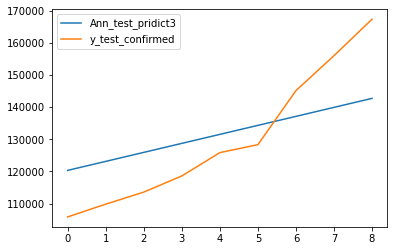

In [54]:
Ann_test_pred3 = linear_model.predict(X_test_confirmed)
plt.plot(Ann_test_pred3)
plt.plot(y_test_confirmed)
plt.legend(["Ann_test_pridict3","y_test_confirmed"])
print('MAE:', mean_absolute_error(Ann_test_pred3, y_test_confirmed))
print('MSE:',mean_squared_error(Ann_test_pred3, y_test_confirmed))

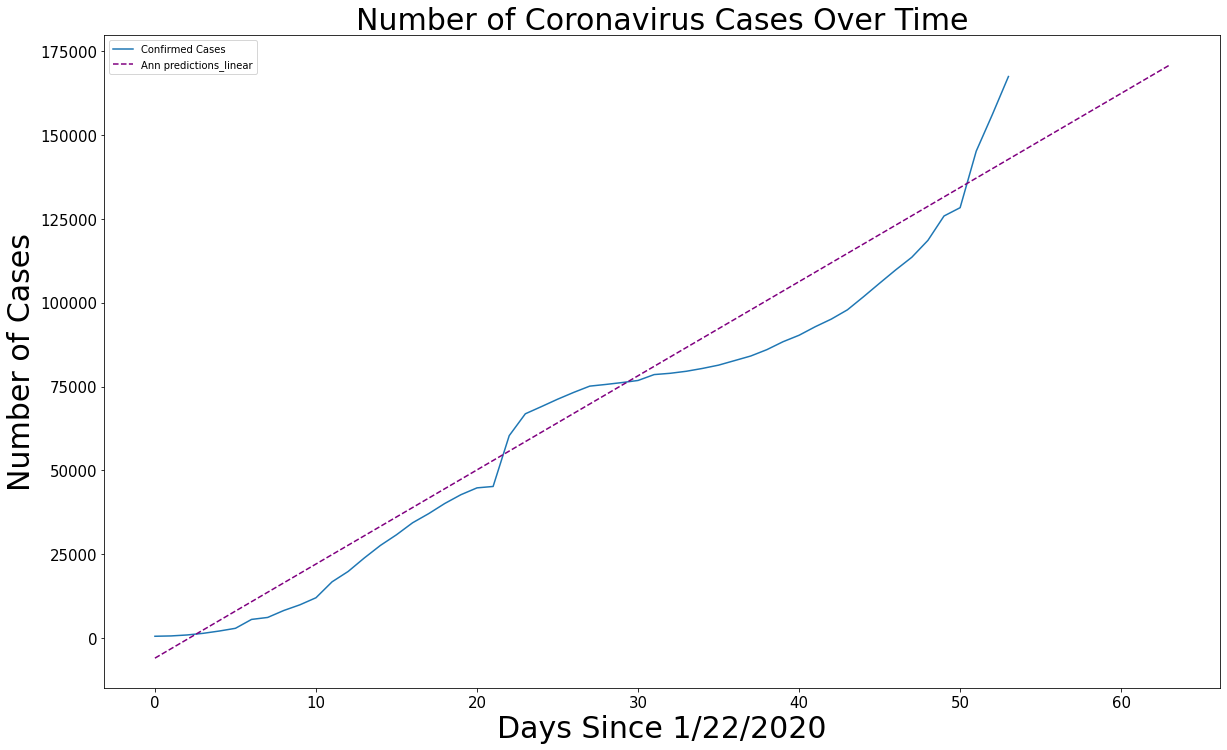

In [55]:
# Confirmed vs Predicted cases
Ann_pred3 = linear_model.predict(future_forecast)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, Ann_pred3, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Ann predictions_linear'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [106]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forecast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
print('future predictions:')
prd2 = []
for i in range(len(Ann_pred3)):
    prd2.append(Ann_pred3[i][0])
a2 = set(zip(future_forcast_dates[-10:], prd2[-10:]))
a2

future predictions:


{('03/16/2020', 145587.2),
 ('03/17/2020', 148393.81),
 ('03/18/2020', 151200.47),
 ('03/19/2020', 154007.05),
 ('03/20/2020', 156813.7),
 ('03/21/2020', 159620.31),
 ('03/22/2020', 162426.95),
 ('03/23/2020', 165233.56),
 ('03/24/2020', 168040.2),
 ('03/25/2020', 170846.83)}

### MOdel 3

Basic neural network with many hidden layer

Activation function: Linear , relu, softmax, sigmoid

optimizer: Adamax optimizer from Adam



In [82]:
model3 = tf.keras.Sequential()


# hidden layers
model3.add(tf.keras.layers.Dense(69, activation='linear', input_dim =1))
model3.add(tf.keras.layers.Dense(50, activation='linear'))
model3.add(tf.keras.layers.Dense(55, activation='linear'))
model3.add(tf.keras.layers.Dense(75, activation='linear'))
model3.add(tf.keras.layers.Dense(67, activation='linear'))
model3.add(tf.keras.layers.Dense(90, activation='linear'))
model3.add(tf.keras.layers.Dense(54, activation='linear'))

# output layer
model3.add(tf.keras.layers.Dense(1, activation='linear'))

# output layer
model3.add(tf.keras.layers.Dense(1, activation='linear'))
optim1 = tf.keras.optimizers.Adamax(learning_rate = 0.5, beta_1 = 0.9, beta_2 = 0.999)
model3.compile(optimizer=optim1,loss='mean_squared_error',metrics=["accuracy"])
model3.fit(X_train_confirmed, y_train_confirmed, epochs=3000)


Epoch 1/3000
2/2 [==============================] - 0s 0s/step - loss: 7253830144.0000 - accuracy: 0.0000e+00
Epoch 2/3000
2/2 [==============================] - 0s 6ms/step - loss: 157363828201533472768.0000 - accuracy: 0.0000e+00
Epoch 3/3000
2/2 [==============================] - 0s 5ms/step - loss: 1059992752152056430592.0000 - accuracy: 0.0000e+00
Epoch 4/3000
2/2 [==============================] - 0s 4ms/step - loss: 4280440823251730432.0000 - accuracy: 0.0000e+00
Epoch 5/3000
2/2 [==============================] - 0s 3ms/step - loss: 218150649987072.0000 - accuracy: 0.0000e+00
Epoch 6/3000
2/2 [==============================] - 0s 4ms/step - loss: 967451897503940608.0000 - accuracy: 0.0000e+00
Epoch 7/3000
2/2 [==============================] - 0s 4ms/step - loss: 59891533060958584832.0000 - accuracy: 0.0000e+00
Epoch 8/3000
2/2 [==============================] - 0s 4ms/step - loss: 86875914555604598784.0000 - accuracy: 0.0000e+00
Epoch 9/3000
2/2 [==============================

2/2 [==============================] - 0s 4ms/step - loss: 132005031313408.0000 - accuracy: 0.0000e+00
Epoch 140/3000
2/2 [==============================] - 0s 3ms/step - loss: 131695902720000.0000 - accuracy: 0.0000e+00
Epoch 141/3000
2/2 [==============================] - 0s 3ms/step - loss: 131470333050880.0000 - accuracy: 0.0000e+00
Epoch 142/3000
2/2 [==============================] - 0s 4ms/step - loss: 131194062635008.0000 - accuracy: 0.0000e+00
Epoch 143/3000
2/2 [==============================] - 0s 5ms/step - loss: 130835558694912.0000 - accuracy: 0.0000e+00
Epoch 144/3000
2/2 [==============================] - 0s 5ms/step - loss: 130590309351424.0000 - accuracy: 0.0000e+00
Epoch 145/3000
2/2 [==============================] - 0s 5ms/step - loss: 130002158878720.0000 - accuracy: 0.0000e+00
Epoch 146/3000
2/2 [==============================] - 0s 4ms/step - loss: 129663108120576.0000 - accuracy: 0.0000e+00
Epoch 147/3000
2/2 [==============================] - 0s 5ms/step - los

2/2 [==============================] - 0s 4ms/step - loss: 86828174540800.0000 - accuracy: 0.0000e+00
Epoch 278/3000
2/2 [==============================] - 0s 5ms/step - loss: 86256994222080.0000 - accuracy: 0.0000e+00
Epoch 279/3000
2/2 [==============================] - 0s 4ms/step - loss: 85863551729664.0000 - accuracy: 0.0000e+00
Epoch 280/3000
2/2 [==============================] - 0s 4ms/step - loss: 85598421385216.0000 - accuracy: 0.0000e+00
Epoch 281/3000
2/2 [==============================] - 0s 5ms/step - loss: 85526371631104.0000 - accuracy: 0.0000e+00
Epoch 282/3000
2/2 [==============================] - 0s 5ms/step - loss: 85408276807680.0000 - accuracy: 0.0000e+00
Epoch 283/3000
2/2 [==============================] - 0s 3ms/step - loss: 85049445711872.0000 - accuracy: 0.0000e+00
Epoch 284/3000
2/2 [==============================] - 0s 5ms/step - loss: 84730837991424.0000 - accuracy: 0.0000e+00
Epoch 285/3000
2/2 [==============================] - 0s 4ms/step - loss: 84328

2/2 [==============================] - 0s 5ms/step - loss: 49004519882752.0000 - accuracy: 0.0000e+00
Epoch 418/3000
2/2 [==============================] - 0s 5ms/step - loss: 48772805558272.0000 - accuracy: 0.0000e+00
Epoch 419/3000
2/2 [==============================] - 0s 4ms/step - loss: 48650499653632.0000 - accuracy: 0.0000e+00
Epoch 420/3000
2/2 [==============================] - 0s 4ms/step - loss: 48430558740480.0000 - accuracy: 0.0000e+00
Epoch 421/3000
2/2 [==============================] - 0s 4ms/step - loss: 48277550530560.0000 - accuracy: 0.0000e+00
Epoch 422/3000
2/2 [==============================] - 0s 6ms/step - loss: 47896372183040.0000 - accuracy: 0.0000e+00
Epoch 423/3000
2/2 [==============================] - 0s 5ms/step - loss: 47660908150784.0000 - accuracy: 0.0000e+00
Epoch 424/3000
2/2 [==============================] - 0s 2ms/step - loss: 47405080772608.0000 - accuracy: 0.0000e+00
Epoch 425/3000
2/2 [==============================] - 0s 2ms/step - loss: 47141

2/2 [==============================] - 0s 4ms/step - loss: 23097684000768.0000 - accuracy: 0.0000e+00
Epoch 558/3000
2/2 [==============================] - 0s 4ms/step - loss: 22953246851072.0000 - accuracy: 0.0000e+00
Epoch 559/3000
2/2 [==============================] - 0s 4ms/step - loss: 22816036487168.0000 - accuracy: 0.0000e+00
Epoch 560/3000
2/2 [==============================] - 0s 5ms/step - loss: 22679339925504.0000 - accuracy: 0.0000e+00
Epoch 561/3000
2/2 [==============================] - 0s 5ms/step - loss: 22569734373376.0000 - accuracy: 0.0000e+00
Epoch 562/3000
2/2 [==============================] - 0s 4ms/step - loss: 22401001717760.0000 - accuracy: 0.0000e+00
Epoch 563/3000
2/2 [==============================] - 0s 3ms/step - loss: 22262491119616.0000 - accuracy: 0.0000e+00
Epoch 564/3000
2/2 [==============================] - 0s 4ms/step - loss: 22184143618048.0000 - accuracy: 0.0000e+00
Epoch 565/3000
2/2 [==============================] - 0s 4ms/step - loss: 21965

2/2 [==============================] - 0s 5ms/step - loss: 8541367697408.0000 - accuracy: 0.0000e+00
Epoch 698/3000
2/2 [==============================] - 0s 5ms/step - loss: 8479090147328.0000 - accuracy: 0.0000e+00
Epoch 699/3000
2/2 [==============================] - 0s 4ms/step - loss: 8416134692864.0000 - accuracy: 0.0000e+00
Epoch 700/3000
2/2 [==============================] - 0s 3ms/step - loss: 8351410814976.0000 - accuracy: 0.0000e+00
Epoch 701/3000
2/2 [==============================] - 0s 4ms/step - loss: 8311435952128.0000 - accuracy: 0.0000e+00
Epoch 702/3000
2/2 [==============================] - 0s 5ms/step - loss: 8235557322752.0000 - accuracy: 0.0000e+00
Epoch 703/3000
2/2 [==============================] - 0s 4ms/step - loss: 8142005993472.0000 - accuracy: 0.0000e+00
Epoch 704/3000
2/2 [==============================] - 0s 5ms/step - loss: 8107823988736.0000 - accuracy: 0.0000e+00
Epoch 705/3000
2/2 [==============================] - 0s 5ms/step - loss: 8017898635264

2/2 [==============================] - 0s 4ms/step - loss: 2308542562304.0000 - accuracy: 0.0000e+00
Epoch 838/3000
2/2 [==============================] - 0s 3ms/step - loss: 2259586121728.0000 - accuracy: 0.0000e+00
Epoch 839/3000
2/2 [==============================] - 0s 3ms/step - loss: 2225111302144.0000 - accuracy: 0.0000e+00
Epoch 840/3000
2/2 [==============================] - 0s 2ms/step - loss: 2194061524992.0000 - accuracy: 0.0000e+00
Epoch 841/3000
2/2 [==============================] - 0s 3ms/step - loss: 2148391321600.0000 - accuracy: 0.0000e+00
Epoch 842/3000
2/2 [==============================] - 0s 3ms/step - loss: 2154281828352.0000 - accuracy: 0.0000e+00
Epoch 843/3000
2/2 [==============================] - 0s 4ms/step - loss: 2142642896896.0000 - accuracy: 0.0000e+00
Epoch 844/3000
2/2 [==============================] - 0s 5ms/step - loss: 2089898213376.0000 - accuracy: 0.0000e+00
Epoch 845/3000
2/2 [==============================] - 0s 3ms/step - loss: 2062919270400

2/2 [==============================] - 0s 3ms/step - loss: 388256759808.0000 - accuracy: 0.0000e+00
Epoch 979/3000
2/2 [==============================] - 0s 3ms/step - loss: 382431526912.0000 - accuracy: 0.0000e+00
Epoch 980/3000
2/2 [==============================] - 0s 3ms/step - loss: 375473307648.0000 - accuracy: 0.0000e+00
Epoch 981/3000
2/2 [==============================] - 0s 3ms/step - loss: 377189105664.0000 - accuracy: 0.0000e+00
Epoch 982/3000
2/2 [==============================] - 0s 3ms/step - loss: 367031156736.0000 - accuracy: 0.0000e+00
Epoch 983/3000
2/2 [==============================] - 0s 3ms/step - loss: 365334069248.0000 - accuracy: 0.0000e+00
Epoch 984/3000
2/2 [==============================] - 0s 2ms/step - loss: 360403632128.0000 - accuracy: 0.0000e+00
Epoch 985/3000
2/2 [==============================] - 0s 3ms/step - loss: 349757931520.0000 - accuracy: 0.0000e+00
Epoch 986/3000
2/2 [==============================] - 0s 3ms/step - loss: 348360900608.0000 - a

2/2 [==============================] - 0s 4ms/step - loss: 35805806592.0000 - accuracy: 0.0000e+00
Epoch 1120/3000
2/2 [==============================] - 0s 4ms/step - loss: 35241570304.0000 - accuracy: 0.0000e+00
Epoch 1121/3000
2/2 [==============================] - 0s 5ms/step - loss: 34518786048.0000 - accuracy: 0.0000e+00
Epoch 1122/3000
2/2 [==============================] - 0s 5ms/step - loss: 33673095168.0000 - accuracy: 0.0000e+00
Epoch 1123/3000
2/2 [==============================] - 0s 5ms/step - loss: 32885010432.0000 - accuracy: 0.0000e+00
Epoch 1124/3000
2/2 [==============================] - 0s 5ms/step - loss: 32247373824.0000 - accuracy: 0.0000e+00
Epoch 1125/3000
2/2 [==============================] - 0s 4ms/step - loss: 31586439168.0000 - accuracy: 0.0000e+00
Epoch 1126/3000
2/2 [==============================] - 0s 4ms/step - loss: 30939723776.0000 - accuracy: 0.0000e+00
Epoch 1127/3000
2/2 [==============================] - 0s 5ms/step - loss: 30397976576.0000 - ac

Epoch 1190/3000
2/2 [==============================] - 0s 4ms/step - loss: 8153999872.0000 - accuracy: 0.0000e+00
Epoch 1191/3000
2/2 [==============================] - 0s 4ms/step - loss: 8627232768.0000 - accuracy: 0.0000e+00
Epoch 1192/3000
2/2 [==============================] - 0s 3ms/step - loss: 7510495744.0000 - accuracy: 0.0000e+00
Epoch 1193/3000
2/2 [==============================] - 0s 3ms/step - loss: 9015504896.0000 - accuracy: 0.0000e+00
Epoch 1194/3000
2/2 [==============================] - 0s 3ms/step - loss: 7658859008.0000 - accuracy: 0.0000e+00
Epoch 1195/3000
2/2 [==============================] - 0s 4ms/step - loss: 8169777664.0000 - accuracy: 0.0000e+00
Epoch 1196/3000
2/2 [==============================] - 0s 4ms/step - loss: 8563799040.0000 - accuracy: 0.0000e+00
Epoch 1197/3000
2/2 [==============================] - 0s 3ms/step - loss: 7527913472.0000 - accuracy: 0.0000e+00
Epoch 1198/3000
2/2 [==============================] - 0s 4ms/step - loss: 7151151616.00

2/2 [==============================] - 0s 5ms/step - loss: 223670592.0000 - accuracy: 0.0000e+00
Epoch 1334/3000
2/2 [==============================] - 0s 5ms/step - loss: 219796416.0000 - accuracy: 0.0000e+00
Epoch 1335/3000
2/2 [==============================] - 0s 3ms/step - loss: 213502320.0000 - accuracy: 0.0000e+00
Epoch 1336/3000
2/2 [==============================] - 0s 4ms/step - loss: 208156528.0000 - accuracy: 0.0000e+00
Epoch 1337/3000
2/2 [==============================] - 0s 4ms/step - loss: 202527216.0000 - accuracy: 0.0000e+00
Epoch 1338/3000
2/2 [==============================] - 0s 4ms/step - loss: 201694224.0000 - accuracy: 0.0000e+00
Epoch 1339/3000
2/2 [==============================] - 0s 3ms/step - loss: 205666400.0000 - accuracy: 0.0000e+00
Epoch 1340/3000
2/2 [==============================] - 0s 3ms/step - loss: 187214208.0000 - accuracy: 0.0000e+00
Epoch 1341/3000
2/2 [==============================] - 0s 4ms/step - loss: 215028352.0000 - accuracy: 0.0000e+00

2/2 [==============================] - 0s 4ms/step - loss: 42310952.0000 - accuracy: 0.0000e+00
Epoch 1479/3000
2/2 [==============================] - 0s 5ms/step - loss: 56729636.0000 - accuracy: 0.0000e+00
Epoch 1480/3000
2/2 [==============================] - 0s 4ms/step - loss: 44900380.0000 - accuracy: 0.0000e+00
Epoch 1481/3000
2/2 [==============================] - 0s 3ms/step - loss: 49336028.0000 - accuracy: 0.0000e+00
Epoch 1482/3000
2/2 [==============================] - 0s 3ms/step - loss: 42684916.0000 - accuracy: 0.0000e+00
Epoch 1483/3000
2/2 [==============================] - 0s 3ms/step - loss: 51459544.0000 - accuracy: 0.0000e+00
Epoch 1484/3000
2/2 [==============================] - 0s 4ms/step - loss: 49470244.0000 - accuracy: 0.0000e+00
Epoch 1485/3000
2/2 [==============================] - 0s 5ms/step - loss: 59212192.0000 - accuracy: 0.0000e+00
Epoch 1486/3000
2/2 [==============================] - 0s 5ms/step - loss: 43330920.0000 - accuracy: 0.0000e+00
Epoch 14

2/2 [==============================] - 0s 3ms/step - loss: 49613136.0000 - accuracy: 0.0000e+00
Epoch 1625/3000
2/2 [==============================] - 0s 5ms/step - loss: 44825436.0000 - accuracy: 0.0000e+00
Epoch 1626/3000
2/2 [==============================] - 0s 2ms/step - loss: 61539256.0000 - accuracy: 0.0000e+00
Epoch 1627/3000
2/2 [==============================] - 0s 6ms/step - loss: 40162712.0000 - accuracy: 0.0000e+00
Epoch 1628/3000
2/2 [==============================] - 0s 3ms/step - loss: 60121052.0000 - accuracy: 0.0000e+00
Epoch 1629/3000
2/2 [==============================] - 0s 6ms/step - loss: 49958492.0000 - accuracy: 0.0000e+00
Epoch 1630/3000
2/2 [==============================] - 0s 4ms/step - loss: 53474860.0000 - accuracy: 0.0000e+00
Epoch 1631/3000
2/2 [==============================] - 0s 5ms/step - loss: 42990696.0000 - accuracy: 0.0000e+00
Epoch 1632/3000
2/2 [==============================] - 0s 4ms/step - loss: 44633672.0000 - accuracy: 0.0000e+00
Epoch 16

2/2 [==============================] - 0s 5ms/step - loss: 41254372.0000 - accuracy: 0.0000e+00
Epoch 1771/3000
2/2 [==============================] - 0s 4ms/step - loss: 42001148.0000 - accuracy: 0.0000e+00
Epoch 1772/3000
2/2 [==============================] - 0s 3ms/step - loss: 42359340.0000 - accuracy: 0.0000e+00
Epoch 1773/3000
2/2 [==============================] - 0s 3ms/step - loss: 44621820.0000 - accuracy: 0.0000e+00
Epoch 1774/3000
2/2 [==============================] - 0s 4ms/step - loss: 40249860.0000 - accuracy: 0.0000e+00
Epoch 1775/3000
2/2 [==============================] - 0s 4ms/step - loss: 49863572.0000 - accuracy: 0.0000e+00
Epoch 1776/3000
2/2 [==============================] - 0s 4ms/step - loss: 56388876.0000 - accuracy: 0.0000e+00
Epoch 1777/3000
2/2 [==============================] - 0s 4ms/step - loss: 42892812.0000 - accuracy: 0.0000e+00
Epoch 1778/3000
2/2 [==============================] - 0s 3ms/step - loss: 50968604.0000 - accuracy: 0.0000e+00
Epoch 17

2/2 [==============================] - 0s 4ms/step - loss: 49852632.0000 - accuracy: 0.0000e+00
Epoch 1917/3000
2/2 [==============================] - 0s 5ms/step - loss: 37730880.0000 - accuracy: 0.0000e+00
Epoch 1918/3000
2/2 [==============================] - 0s 4ms/step - loss: 77832200.0000 - accuracy: 0.0000e+00
Epoch 1919/3000
2/2 [==============================] - 0s 5ms/step - loss: 50024836.0000 - accuracy: 0.0000e+00
Epoch 1920/3000
2/2 [==============================] - 0s 4ms/step - loss: 42120824.0000 - accuracy: 0.0000e+00
Epoch 1921/3000
2/2 [==============================] - 0s 5ms/step - loss: 47318140.0000 - accuracy: 0.0000e+00
Epoch 1922/3000
2/2 [==============================] - 0s 4ms/step - loss: 51814296.0000 - accuracy: 0.0000e+00
Epoch 1923/3000
2/2 [==============================] - 0s 4ms/step - loss: 55245652.0000 - accuracy: 0.0000e+00
Epoch 1924/3000
2/2 [==============================] - 0s 5ms/step - loss: 56868956.0000 - accuracy: 0.0000e+00
Epoch 19

2/2 [==============================] - 0s 5ms/step - loss: 120150336.0000 - accuracy: 0.0000e+00
Epoch 2063/3000
2/2 [==============================] - 0s 5ms/step - loss: 219793520.0000 - accuracy: 0.0000e+00
Epoch 2064/3000
2/2 [==============================] - 0s 4ms/step - loss: 213713632.0000 - accuracy: 0.0000e+00
Epoch 2065/3000
2/2 [==============================] - 0s 3ms/step - loss: 329503392.0000 - accuracy: 0.0000e+00
Epoch 2066/3000
2/2 [==============================] - 0s 3ms/step - loss: 121084032.0000 - accuracy: 0.0000e+00
Epoch 2067/3000
2/2 [==============================] - 0s 3ms/step - loss: 55812700.0000 - accuracy: 0.0000e+00
Epoch 2068/3000
2/2 [==============================] - 0s 2ms/step - loss: 52898588.0000 - accuracy: 0.0000e+00
Epoch 2069/3000
2/2 [==============================] - 0s 4ms/step - loss: 61600508.0000 - accuracy: 0.0000e+00
Epoch 2070/3000
2/2 [==============================] - 0s 4ms/step - loss: 78242288.0000 - accuracy: 0.0000e+00
Epo

2/2 [==============================] - 0s 5ms/step - loss: 149582800.0000 - accuracy: 0.0000e+00
Epoch 2208/3000
2/2 [==============================] - 0s 6ms/step - loss: 103568000.0000 - accuracy: 0.0000e+00
Epoch 2209/3000
2/2 [==============================] - 0s 5ms/step - loss: 146527936.0000 - accuracy: 0.0000e+00
Epoch 2210/3000
2/2 [==============================] - 0s 7ms/step - loss: 42732636.0000 - accuracy: 0.0000e+00
Epoch 2211/3000
2/2 [==============================] - 0s 3ms/step - loss: 143745472.0000 - accuracy: 0.0000e+00
Epoch 2212/3000
2/2 [==============================] - 0s 2ms/step - loss: 79283208.0000 - accuracy: 0.0000e+00
Epoch 2213/3000
2/2 [==============================] - 0s 3ms/step - loss: 45448496.0000 - accuracy: 0.0000e+00
Epoch 2214/3000
2/2 [==============================] - 0s 4ms/step - loss: 285493568.0000 - accuracy: 0.0000e+00
Epoch 2215/3000
2/2 [==============================] - 0s 4ms/step - loss: 88633736.0000 - accuracy: 0.0000e+00
Epo

2/2 [==============================] - 0s 4ms/step - loss: 16388680843264.0000 - accuracy: 0.0000e+00
Epoch 2350/3000
2/2 [==============================] - 0s 4ms/step - loss: 34086378799104.0000 - accuracy: 0.0000e+00
Epoch 2351/3000
2/2 [==============================] - 0s 3ms/step - loss: 47477172469760.0000 - accuracy: 0.0000e+00
Epoch 2352/3000
2/2 [==============================] - 0s 4ms/step - loss: 52306439569408.0000 - accuracy: 0.0000e+00
Epoch 2353/3000
2/2 [==============================] - 0s 4ms/step - loss: 20199449296896.0000 - accuracy: 0.0000e+00
Epoch 2354/3000
2/2 [==============================] - 0s 4ms/step - loss: 22090921017344.0000 - accuracy: 0.0000e+00
Epoch 2355/3000
2/2 [==============================] - 0s 3ms/step - loss: 21676192432128.0000 - accuracy: 0.0000e+00
Epoch 2356/3000
2/2 [==============================] - 0s 5ms/step - loss: 6992938139648.0000 - accuracy: 0.0000e+00
Epoch 2357/3000
2/2 [==============================] - 0s 6ms/step - loss

2/2 [==============================] - 0s 5ms/step - loss: 2084591108096.0000 - accuracy: 0.0000e+00
Epoch 2492/3000
2/2 [==============================] - 0s 5ms/step - loss: 101817303040.0000 - accuracy: 0.0000e+00
Epoch 2493/3000
2/2 [==============================] - 0s 5ms/step - loss: 131089858560.0000 - accuracy: 0.0000e+00
Epoch 2494/3000
2/2 [==============================] - 0s 3ms/step - loss: 633922846720.0000 - accuracy: 0.0000e+00
Epoch 2495/3000
2/2 [==============================] - 0s 4ms/step - loss: 457588736000.0000 - accuracy: 0.0000e+00
Epoch 2496/3000
2/2 [==============================] - 0s 5ms/step - loss: 7418528399360.0000 - accuracy: 0.0000e+00
Epoch 2497/3000
2/2 [==============================] - 0s 4ms/step - loss: 1708743065600.0000 - accuracy: 0.0000e+00
Epoch 2498/3000
2/2 [==============================] - 0s 5ms/step - loss: 2734241873920.0000 - accuracy: 0.0000e+00
Epoch 2499/3000
2/2 [==============================] - 0s 5ms/step - loss: 113141494

2/2 [==============================] - 0s 6ms/step - loss: 471381586214912.0000 - accuracy: 0.0000e+00
Epoch 2630/3000
2/2 [==============================] - 0s 5ms/step - loss: 689929118023680.0000 - accuracy: 0.0000e+00
Epoch 2631/3000
2/2 [==============================] - 0s 5ms/step - loss: 1306006810263552.0000 - accuracy: 0.0000e+00
Epoch 2632/3000
2/2 [==============================] - 0s 5ms/step - loss: 2213652048379904.0000 - accuracy: 0.0000e+00
Epoch 2633/3000
2/2 [==============================] - 0s 5ms/step - loss: 1109348646387712.0000 - accuracy: 0.0000e+00
Epoch 2634/3000
2/2 [==============================] - 0s 5ms/step - loss: 1779646005772288.0000 - accuracy: 0.0000e+00
Epoch 2635/3000
2/2 [==============================] - 0s 5ms/step - loss: 2529588903149568.0000 - accuracy: 0.0000e+00
Epoch 2636/3000
2/2 [==============================] - 0s 4ms/step - loss: 1502184810217472.0000 - accuracy: 0.0000e+00
Epoch 2637/3000
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 3ms/step - loss: 76844576.0000 - accuracy: 0.0000e+00
Epoch 2771/3000
2/2 [==============================] - 0s 2ms/step - loss: 43740016.0000 - accuracy: 0.0000e+00
Epoch 2772/3000
2/2 [==============================] - 0s 4ms/step - loss: 46548736.0000 - accuracy: 0.0000e+00
Epoch 2773/3000
2/2 [==============================] - 0s 3ms/step - loss: 43452156.0000 - accuracy: 0.0000e+00
Epoch 2774/3000
2/2 [==============================] - 0s 2ms/step - loss: 48134236.0000 - accuracy: 0.0000e+00
Epoch 2775/3000
2/2 [==============================] - 0s 3ms/step - loss: 48912668.0000 - accuracy: 0.0000e+00
Epoch 2776/3000
2/2 [==============================] - 0s 2ms/step - loss: 51565392.0000 - accuracy: 0.0000e+00
Epoch 2777/3000
2/2 [==============================] - 0s 4ms/step - loss: 49358448.0000 - accuracy: 0.0000e+00
Epoch 2778/3000
2/2 [==============================] - 0s 3ms/step - loss: 48188924.0000 - accuracy: 0.0000e+00
Epoch 27

2/2 [==============================] - 0s 3ms/step - loss: 82013808.0000 - accuracy: 0.0000e+00
Epoch 2844/3000
2/2 [==============================] - 0s 3ms/step - loss: 84714784.0000 - accuracy: 0.0000e+00
Epoch 2845/3000
2/2 [==============================] - 0s 3ms/step - loss: 55465268.0000 - accuracy: 0.0000e+00
Epoch 2846/3000
2/2 [==============================] - 0s 5ms/step - loss: 43276844.0000 - accuracy: 0.0000e+00
Epoch 2847/3000
2/2 [==============================] - 0s 7ms/step - loss: 43865892.0000 - accuracy: 0.0000e+00
Epoch 2848/3000
2/2 [==============================] - 0s 5ms/step - loss: 58045348.0000 - accuracy: 0.0000e+00
Epoch 2849/3000
2/2 [==============================] - 0s 5ms/step - loss: 48921116.0000 - accuracy: 0.0000e+00
Epoch 2850/3000
2/2 [==============================] - 0s 5ms/step - loss: 40734396.0000 - accuracy: 0.0000e+00
Epoch 2851/3000
2/2 [==============================] - 0s 5ms/step - loss: 58082144.0000 - accuracy: 0.0000e+00
Epoch 28

2/2 [==============================] - 0s 4ms/step - loss: 11994248192.0000 - accuracy: 0.0000e+00
Epoch 2987/3000
2/2 [==============================] - 0s 5ms/step - loss: 14901199872.0000 - accuracy: 0.0000e+00
Epoch 2988/3000
2/2 [==============================] - 0s 4ms/step - loss: 25701830656.0000 - accuracy: 0.0000e+00
Epoch 2989/3000
2/2 [==============================] - 0s 4ms/step - loss: 9235412992.0000 - accuracy: 0.0000e+00
Epoch 2990/3000
2/2 [==============================] - 0s 6ms/step - loss: 20532330496.0000 - accuracy: 0.0000e+00
Epoch 2991/3000
2/2 [==============================] - 0s 7ms/step - loss: 16696095744.0000 - accuracy: 0.0000e+00
Epoch 2992/3000
2/2 [==============================] - 0s 4ms/step - loss: 24433551360.0000 - accuracy: 0.0000e+00
Epoch 2993/3000
2/2 [==============================] - 0s 5ms/step - loss: 28765267968.0000 - accuracy: 0.0000e+00
Epoch 2994/3000
2/2 [==============================] - 0s 4ms/step - loss: 4393442304.0000 - accu

In [109]:
model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 69)                138       
                                                                 
 dense_128 (Dense)           (None, 50)                3500      
                                                                 
 dense_129 (Dense)           (None, 55)                2805      
                                                                 
 dense_130 (Dense)           (None, 75)                4200      
                                                                 
 dense_131 (Dense)           (None, 67)                5092      
                                                                 
 dense_132 (Dense)           (None, 90)                6120      
                                                                 
 dense_133 (Dense)           (None, 54)              

MAE: 55528.750868055555
MSE: 3350069326.172953


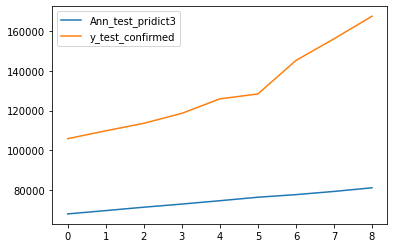

In [83]:
pred3 = model3.predict(X_test_confirmed)
plt.plot(pred3)
plt.plot(y_test_confirmed)
plt.legend(["Ann_test_pridict3","y_test_confirmed"])
print('MAE:', mean_absolute_error(pred3, y_test_confirmed))
print('MSE:',mean_squared_error(pred3, y_test_confirmed))

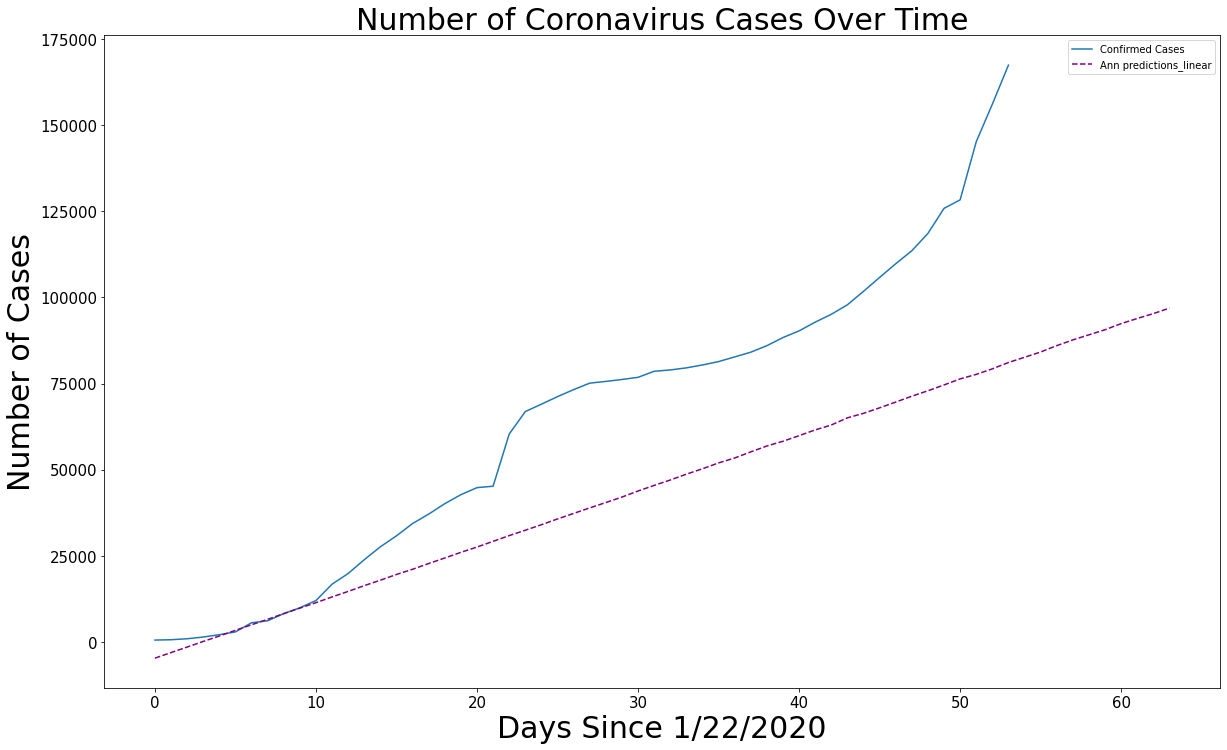

In [84]:
# Confirmed vs Predicted cases
_pred3 = model3.predict(future_forecast)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, _pred3, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Ann predictions_linear'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [108]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forecast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
print('future predictions:')
prd3 = []
for i in range(len(_pred3)):
    prd3.append(_pred3[i][0])
a3 = set(zip(future_forcast_dates[-10:], prd3[-10:]))
a3

future predictions:


{('03/16/2020', 82644.16),
 ('03/17/2020', 84176.52),
 ('03/18/2020', 86023.36),
 ('03/19/2020', 87685.51),
 ('03/20/2020', 89167.97),
 ('03/21/2020', 90640.445),
 ('03/22/2020', 92417.4),
 ('03/23/2020', 93909.84),
 ('03/24/2020', 95322.42),
 ('03/25/2020', 96914.695)}